# Complex Functions

In this Chapter we investigate the algebra and geometry of the complex
plane, $\maC$, and begin the study of the calculus of functions from 
$\maC$ to $\maC$. Although there may be much that is new about this
chapter - the basic tool of Partial Fraction Expansion is elementary
and perhaps fondly remembered from real calculus.
Our intent here is to prepare the way for the complex integration required
to make sense of the resolvent, eigenvalue problem and the inverse Laplace 
transform and their role in understanding dynamics - though we pause to
develop the basics of Fourier Series and Transforms and its application to
Time Series.


## Complex Numbers, Vectors and Matrices

A complex number is simply a pair of real numbers. In order to stress
however that the two algebras differ we separate the two real pieces
by the symbol $+i$. More precisely, each complex number, $z$, may be
uniquely expressed by the combination $x+iy$ where $x$ and $y$ are real
and $i$ denotes $\sqrt{-1}$. We call $x$ the  **real**  part and $y$ the
 **imaginary**  part of $z$. We now summarize the main rules of complex
arithmetic.  If

\begin{equation*}
  z_1 = x_1 + iy_1 \and z_2 = x_2 + iy_2
\end{equation*}

then

\begin{equation*}
  \eqalign{ z_1+z_2 &\equiv (x_1+x_2)+i(y_1+y_2) \cr
             z_1z_2 &\equiv (x_1 + iy_1)(x_2 + iy_2) = 
                       (x_1x_2-y_1y_2)+i(x_1y_2+x_2y_1) \cr
            \ov z_1 &\equiv x_1-iy_1, \cr
    \frac{z_1}{z_2} &\equiv \frac{z_1}{z_2}\frac{\ov z_2}{\ov z_2}
                  = \frac{(x_1x_2+y_1y_2)+i(x_2y_1-x_1y_2)}{x_2^2+y_2^2} \cr
              |z_1| &\equiv \sqrt{z_1\ov z_1} = \sqrt{x_1^2+y_1^2}. \cr}
\end{equation*}

In addition to the Cartesian representation $z=x+iy$ one also has the
polar form

\begin{equation}
  z = |z|(\cos\theta+i\sin\theta), \label{eq:polarform}
\end{equation}

where $|z|$ is the magnitude of $z$ and $\theta$ is the angle that it make
with the positive real axis. We have illustrated these various 
representations in \fig\figref{cplane}.

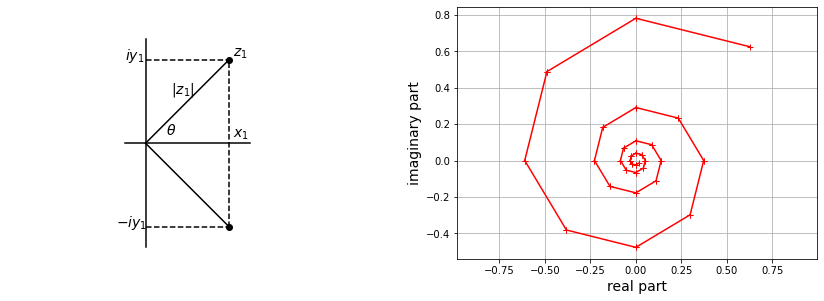

In [175]:
# cplane

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

#ax1.figure(figsize=(6,6))
ax1.plot([-.25, 1.25],[0, 0],'k')
ax1.plot([0, 0],[-1.25, 1.25],'k')
ax1.plot([0, 1],[0, 1],'k','linewidth',1.5)
ax1.plot(1,1,'k.',markersize=12)
ax1.plot([0, 1],[0, -1],'k')
ax1.plot(1,-1,'k.',markersize=12)
ax1.plot([0, 1],[1, 1],'k--')
ax1.plot([0, 1],[-1, -1],'k--')
ax1.plot([1, 1],[-1, 1],'k--')
ax1.text(1.05,0.075,'$x_1$',fontsize=14)
ax1.text(-.25,1,'$iy_1$',fontsize=14)
ax1.text(-.35,-1,'$-iy_1$',fontsize=14)
ax1.text(.25,.1,'$\\theta$',fontsize=14)
ax1.text(1.05,1.05,'$z_1$',fontsize=14)
#s, =, ax1.text(1.1,-1.1,'$\bar, {\tt, z}_1$')
#set(s,'interpreter','latex')
ax1.text(.3,.6,'$|z_1|$',fontsize=14)

ax1.axis('equal')
ax1.axis('off')

z = (1/1.6)*(1+1j)
z0 = z
for j in range(2,32):
    z1 = z0*z
    ax2.plot([z0.real, z1.real],[z0.imag, z1.imag],'r-+',linewidth=1.5)
    z0 = z1

ax2.axis('equal')
ax2.grid('on')
ax2.set_xlabel('real part',fontsize=14)
ax2.set_ylabel('imaginary part',fontsize=14);

\Fig\figref{cplane}. (A) An illustration of the complex number
$z_1=x_1+iy_1=|z_1|(\cos\theta+i\sin\theta)$.} (B) The trajectory of
$((1+i)/1.6)^n$ as $n$ grows 1 to 32.

The polar form is especially convenient with regards to multiplication.
More precisely,

\begin{equation*}
  \eqalign{z_1z_2 &= |z_1||z_2|\{(\cos\theta_1\cos\theta_2-\sin\theta_1\sin\theta_2)+
                              i(\cos\theta_1\sin\theta_2+\sin\theta_1\cos\theta_2)\} \cr
                  &= |z_1||z_2|\{\cos(\theta_1+\theta_2)+i\sin(\theta_1+\theta_2)\}. \cr}
\end{equation*}

As a result, for integer values of $n$, we find

\begin{equation*}
  z^n = |z|^n(\cos(n\theta)+i\sin(n\theta)).
\end{equation*}

This formula dictates that taking powers of a complex number simultaneously 
scales its magnitude and rotates its argument. The spiral in \fig\figref{cplane}(B)
offers a concrete illustration.



A complex vector (matrix) is simply a vector (matrix) of complex numbers.
Vector and matrix addition proceed, as in the real case, from element-wise
addition. The inner product of two complex vectors requires, however,
some care. This is evident when we try to use the old notion to
define the length of complex vector. To wit, note that if

\begin{equation*}
  z = \begin{pmatrix}1+i \\ 1-i \end{pmatrix}
\end{equation*}

then

\begin{equation*}
  z^Tz = (1+i)^2 + (1-i)^2 = 1+2i-1+1-2i-1 = 0.
\end{equation*}

Now norm  **should**  measure the distance from a point to the origin and
should only be zero for the zero vector. The fix, as you have probably guessed,
is to sum the squares of the  **magnitudes**  of the components of $z$. This
is accomplished by simply conjugating one of the vectors. Namely, we define
the norm of a complex vector via  \index{norm!vector!complex}

\begin{equation}
  \|z\| \equiv \sqrt{\ov z^Tz}. \label{eq:cnorm}
\end{equation}

In the example above this produces

\begin{equation*}
  \sqrt{|1+i|^2+|1-i|^2} = \sqrt 4 = 2.
\end{equation*}

As each real number is the conjugate of itself, this new definition subsumes 
its real counterpart. The double symbol, conjugate transpose, occurs so
often - for both vectors and matrices - that it has been contracted to 
a single symbol. Namely  \index{conjugate transpose}

\begin{equation}
  \boxed{Z^* \equiv {\ov Z}^T, \hskip 0.25in Z\in\maC^{m\times n}.} \label{eq:conjtran}
\end{equation}

The notion of magnitude in (\ref{eq:cnorm}) also gives us a way to 
define limits and hence will
permit us to introduce complex calculus. We say that the sequence of complex
numbers, $\{z_n:n=1,2,\ldots\}$, converges to the complex number $z_0$ and
write

\begin{equation*}
  z_n\to z_0 \hskip 0.25in\hbox{or}\hskip 0.25in z_0 = \lim_{n\to\infty}z_n,
\end{equation*}

when, presented with any $\eps>0$ one can produce an integer $N$ for which
$|z_n-z_0|<\eps$ when $n\ge N$. As an example, we note that $(i/2)^n\to 0$,
for given an $\eps$ we note that if $n>N=\log_2(1/\eps)$ then $|(i/2)^n|<\eps$.
Similarly, the series

\begin{equation*}
  \sum_{n=1}^\infty z_n 
\end{equation*}

is said to converge to the number $Z$ if the sequence of partial sums

\begin{equation*}
  Z_n \equiv \sum_{m=1}^nz_m
\end{equation*}

converge to $Z$. We shall make use of



\proclabel{cv11}

\Prop\procref{cv11}. If $z_j\to z$ and

\begin{equation*}
  c_n \equiv \frac{1}{n}\sum_{j=1}^n z_j
\end{equation*}

then $c_n\to z$.




**Proof:** Given $\eps>0$ as $z_j\to z$ there exists an $N>0$ such
that $|z_j-z|<\eps/2$ when $j\ge N$. Now, for $n>N$ write

\begin{equation*}
  \eqalign{|z-c_n| 
  = \left|z-\frac{1}{n}\sum_{m=1}^nz_m\right| 
  = \left|\frac{1}{n}\sum_{m=1}^n(z-z_m)\right| 
   &\le  \frac{1}{n}\sum_{m=1}^n|z-z_m| \cr
   &= \frac{1}{n}\sum_{m=1}^N|z-z_m|  +
   \frac{1}{n}\sum_{m=N+1}^n|z-z_m| \cr
   &\le \frac{\eps}{2} + \frac{1}{n}\sum_{m=1}^N|z-z_m| \cr}
\end{equation*}

and so $|z-c_n|<\eps$ when $n>N$ and 

\begin{equation*}
  n > \frac{2}{\eps}\sum_{m=1}^N|z-z_m|.
\end{equation*}

**End of Proof.**

\begin{exercise}\label{ex:geoser} Suppose $z\ne 1$ and define the $n$-term geometric series

\begin{equation*}
  \sigma \equiv \sum_{k=0}^{n-1}z^k,
\end{equation*}

and show, by brute force, that $\sigma-z\sigma = 1-z^n$. Derive
(\ref{eq:FFjk}) from this result. \index{geometric series}
\end{exercise}

\begin{exercise}\label{ex:cesaro} Deduce from \prop\procref{cv11} that if

\begin{equation*}
  Z = \lim_{N\to\infty}\sum_{n=1}^N z_n \hskip 0.25in\hbox{then}\hskip 0.25in
  Z = \lim_{N\to\infty}\sum_{n=1}^N (1-n/N)z_n.
\end{equation*} 
 
\end{exercise}

\begin{exercise}\label{ex:matReIm} Given a complex matrix
$Z$ define its "real part" to be
$X\equiv (Z+Z^*)/2$ and its "imaginary part" to be $Y=(Z-Z^*)/(2i)$.
Recall that $Z^*$ denotes its conjugate transpose, (\ref{eq:conjtran})
Show that $Z=X+iY$ and $X^*=X$ and $Y^*=Y$.
\end{exercise}

\begin{exercise}\label{ex:trHerm} Suppose $Z\in\maC^{n\times n}$. Show that if
$\tr(ZH)=0$ for every  $H\in\maC^{n\times n}$ for which $H=H^*$ then
$Z=0$. Hint: use the previous exercise to write $Z^*=X-iY$ and
note that $ZZ^*=ZX-iZY$.
\end{exercise}

\begin{exercise}\label{ex:optz0} Given $z_0\in\maC$ show that

\begin{equation}
   |z|^2-2\Re(\ov z z_0) \ge -|z_0|^2, \hskip 0.25in \forall z\in\maC  \label{eq:1dopt}
\end{equation}

with equality iff $z=z_0$. Hint: Write $z=x+iy$ and $z_0=x_0+iy_0$ and expand both sides.
\end{exercise}

\begin{exercise}\label{ex:PauliMat} Show that the Pauli matrices \index{Pauli Matrices}

\begin{equation}
  \tau_1 \equiv \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \hskip 0.25in
    \tau_2 \equiv \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \and
  \tau_3 \equiv \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \label{eq:Pauli1}
\end{equation}

obey the anti-commutation relations

\begin{equation}
  \tau_j\tau_k+\tau_k\tau_j = 2\delta_{j,k}I_2,  \hskip 0.25in 1\le j,k\le 3\label{eq:Pauli2}
\end{equation}

where $I_2$ is the 2-by-2 identity matrix, and the cyclic product formula

\begin{equation}
  \tau_j\tau_{j+1} = i\tau_{j+2}, \hskip 0.25in j=1,2,3 \label{eq:Pauli3}
\end{equation}

where the subscripts are computed modulo 3.
\end{exercise}

\begin{exercise}\label{ex:quater} We consider the integral quaternions

\begin{equation*}
  \maH(\maZ) = \{a_0+a_1i+a_2j+a_3k:a_0,\ a_1,\ a_2,\ a_3\in\maZ\}
\end{equation*}

where the distinguished $i,j$ and $k$ obey $i^2=j^2=k^2=-1$, $ij=-ji=k$,
$jk=-kj=i$ and $ki=-ik=j$.


 (a) Find the $4$ solutions in $\maH(\maZ)$ to

\begin{equation*}
 a_0^2+a_1^2+a_2^2+a_3^2 = 3
\end{equation*}

with $a_0=0$.

 (b) Show that if $x$ and $y$ in $\maF_q$ satisfy $x^2+y^2+1=0$
then

\begin{equation}
  \psi(a_0+a_1i+a_2j+a_3k) = \begin{pmatrix}a_0+a_1x+a_3y & -a_1y+a_2+a_3x \\
                   -a_1y-a_2+a_3x & a_0-a_1x-a_3y \end{pmatrix}
  \label{eq:quatpsi}
\end{equation}

is an isomorphism from $\maH(\maF_q)$ to $M_2(\maF_q)$, the algebra of
2-by-2 matrices with elements in $\maF_q$. In particular, show that

\begin{equation*}
  \psi(ab)=\psi(a)\psi(b) \hskip 0.25in\forall a,b\in\maH(\maF_q)
\end{equation*}

and that $\psi(a)=0$ iff $a=0$. Hint: Write $\psi(a)=0$ as 4 linear equations
in the 4 coefficients of $a$ and show that the associated determinant is
nonzero. 
\end{exercise}

## Complex Functions

A complex function is merely a rule for assigning certain complex numbers to
other complex numbers. The simplest (nonconstant) assignment is the identity 
function $f(z)\equiv z$. Perhaps the next simplest function assigns to each
number its square, i.e., $f(z)\equiv z^2$. As we decomposed the  **argument** 
of $f$, namely $z$, into its real and imaginary parts, we shall also find
it convenient to partition the  **value**  of $f$, $z^2$ in this case, into
its real and imaginary parts. In general, we write

\begin{equation*}
  f(x+iy) = u(x,y)+iv(x,y)
\end{equation*}

where $u$ and $v$ are both real-valued functions of two real variables.
In the case that $f(z)\equiv z^2$ we find

\begin{equation*}
  u(x,y) = x^2-y^2 \and v(x,y) = 2xy.
\end{equation*}

With the tools of the previous section we may produce complex polynomials 

\begin{equation*}
   f(z) = z^m + c_{m-1}z^{m-1} + \cdots + c_1z + c_0.
\end{equation*}

We say that such an $f$ is of  **degree**  $m$.
We shall often find it convenient to represent polynomials as the product
of their factors, namely

\begin{equation}
  f(z) = (z-\la_1)^{o_1}(z-\la_2)^{o_2}\cdots(z-\la_h)^{o_h}. \label{eq:froots}
\end{equation}

Each $\la_j$ is a  **root** of $f$ of **order**  $o_j$. Here $h$ is the
number of  **distinct**  roots of $f$.  Polynomials are the archetypes of continuous functions.

The complex function $f$ is said to be  **continuous**  at the point $z$ when $f(z_n)\to f(z)$ whenever
$z_n\to z$. \index{continuous function}
 
In the previous chapter we observed the 
appearance of ratios of polynomials, or so called  **rational**  functions,
when taking Laplace transforms, (\ref{eq:lap6G}), and evaluating
resolvents, (\ref{eq:Reslap}. \index{rational function}) 
Suppose

\begin{equation*}
  r(z) = \frac{f(z)}{g(z)}
\end{equation*}

is rational, that $f$ is of degree at most $m-1$ while $g$ is of degree $m$
with $m$ distinct roots $\{\la_1,\ldots,\la_m\}$. Our central task is to arrive
at multiple, and complementary means of computing the $r_j$ in the
 **Partial Fraction Expansion** 

\begin{equation}
  r(z) = \sum_{j=1}^m \frac{r_j}{z-\la_j} \label{eq:rathypo}
\end{equation}

of $r$. Our first approach is a direct one, that you may recall from calculus.
We uncover the $r_j$ by first multiplying each side of (\ref{eq:rathypo}) by 
$(z-\la_j)$ and then setting $z=\la_j$. For example, if

\begin{equation}
  \frac{1}{z^2+1} = \frac{r_1}{z+i} + \frac{r_2}{z-i} \label{eq:pfeex1}
\end{equation}

then multiplying each side by $(z+i)$ produces

\begin{equation*}
  \frac{1}{z-i} = r_1 + \frac{r_2(z+i)}{z-i}.
\end{equation*}

Now, in order to isolate $r_1$ it is clear that we should set $z=-i$.
So doing we find $r_1=i/2$. In order to find $r_2$ we multiply (\ref{eq:pfeex1})
by $(z-i)$ and then set $z=i$. So doing we find $r_2=-i/2$, and so

\begin{equation}
\frac{1}{z^2+1} = \frac{i/2}{z+i} + \frac{-i/2}{z-i}. \label{eq:pfeex2}
\end{equation}

Returning to the general case, we encode the above in the simple
formula

\begin{equation}
  r_j = (z-\la_j)r(z)\big|_{z=\la_j}. \label{eq:pfesimp}
\end{equation}

You should be able to use this to confirm that

\begin{equation}
  \frac{z}{z^2+1} = \frac{1/2}{z+i} + \frac{1/2}{z-i}. \label{eq:pfeex3}
\end{equation}

We now have the tools to compute the partial fraction expansion of the 
resolvent

\begin{equation}
  (zI-B)^{-1} = \frac{1}{z^2+1}\begin{pmatrix}z & 1 \cr -1 & z \end{pmatrix}
    \label{eq:bonemassres}
\end{equation}

of the matrix, (\ref{eq:Bonemass}), associated with the vibration of a
single mass, when $k=m$. In particular, (\ref{eq:pfeex2} and \Eqref{pfeex3}) 
allow us to write (\ref{eq:bonemassres}) as

\begin{equation}
  (zI-B)^{-1} 
    = \frac{1}{z+i}\begin{pmatrix}1/2 & i/2 \cr -i/2 & 1/2\end{pmatrix} +
      \frac{1}{z-i}\begin{pmatrix}1/2 & -i/2 \cr i/2 & 1/2\end{pmatrix}. 
    \label{eq:res1}
\end{equation}

We recognize these coefficient matrices as precisely those that
appear in (\ref{eq:BonemassExp}).


In Chapter 8 we were confronted with the complex exponential
when considering the Laplace Transform.
By analogy to the real exponential we define

\begin{equation}
  \boxed{\exp(z) \equiv \sum_{n=0}^\infty\frac{z^n}{n!}} \label{eq:expps}
\end{equation}

and find that, for $\theta\in\maR$,

\begin{equation}
  \eqalign{\exp(i\theta) &= 1 + i\theta + (i\theta)^2/2 + (i\theta)^3/3! + (i\theta)^4/4! + 
                         \cdots \cr
      &= (1-\theta^2/2+\theta^4/4!-\cdots)+i(\theta-\theta^3/3!+\theta^5/5!-\cdots) \cr
      &= \cos\theta + i\sin\theta. \cr} \label{eq:eulerform}
\end{equation} 
 
This should hopefully clear up any mystery remaining from (\ref{eq:preEuler}).
With these observations, the polar form is now simply $z=|z|\exp(i\theta)$.
One may just as easily verify that

\begin{equation*}
  \cos\theta = \frac{\exp(i\theta)+\exp(-i\theta)}{2} \and
  \sin\theta = \frac{\exp(i\theta)-\exp(-i\theta)}{2i}.
\end{equation*}

These suggest the definitions, for complex $z$, of

\begin{equation}
  \boxed{\cos z \equiv \frac{\exp(iz)+\exp(-iz)}{2}} \and
  \boxed{\sin z \equiv \frac{\exp(iz)-\exp(-iz)}{2i}.}  \label{eq:coszsinz}
\end{equation}

As in the real case the exponential enjoys the property that

\begin{equation*}
  \exp(z_1+z_2)=\exp(z_1)\exp(z_2)
\end{equation*}

and in particular

\begin{equation*}
  \exp(x+iy)=\exp(x)\exp(iy)=\exp(x)(\cos y + i\sin y).
\end{equation*}

In order to visualize these complex functions we plot in \fig\figref{zgraph}
their transformation of a regular grid as well their associated vector fields

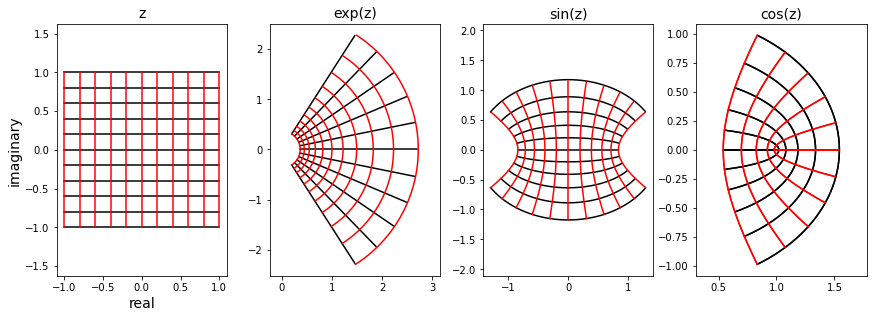

In [65]:
# zgraph

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

xL, yL = -1, -1 
xR, yR = 1, 1
N = 10
dx = -(xL-xR)/N
dy = -(yL-yR)/N
x = np.arange(xL, xR, 0.01)
            
for r in range(N+1):
    y = yL + r*dy
    z = x + 1j*y
       
    ax1.plot([xL,xR],[y,y],'k')
        
    w = np.exp(z)
    ax2.plot(w.real,w.imag,'k')
        
    w = np.sin(z)       
    ax3.plot(w.real,w.imag,'k')
        
    w = np.cos(z)
    ax4.plot(w.real,w.imag,'k')

y = np.arange(yL, yR, 0.01)
    
for c in range(N+1):
    x = xL + c*dx
    z = x+1j*y
        
    ax1.plot([x, x],[yL,yR],'r')
        
    w = np.exp(z)
    ax2.plot(w.real,w.imag,'r')
        
    w = np.sin(z)
    ax3.plot(w.real,w.imag,'r')
        
    w = np.cos(z)
    ax4.plot(w.real,w.imag,'r')
    
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax4.axis('equal')
ax1.set_xlabel('real',fontsize=14)
ax1.set_ylabel('imaginary',fontsize=14)
ax1.set_title('z',fontsize=14)
ax2.set_title('exp(z)',fontsize=14)
ax3.set_title('sin(z)',fontsize=14)
ax4.set_title('cos(z)',fontsize=14);

\figlabel{zgraph}
 \Fig\figref{zgraph}. The deformation of horizontal (black) segments
and vertical (red) segments by $\exp$, $\sin$ and $\cos$. 

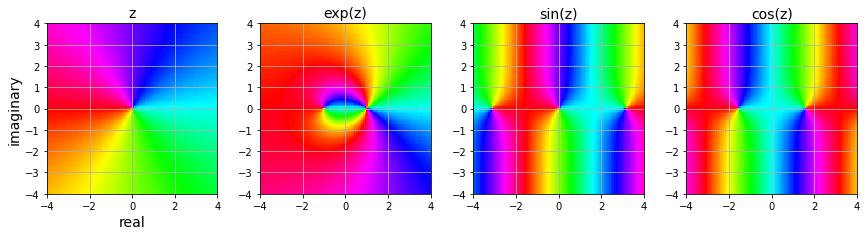

In [334]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)
X, Y = np.meshgrid(x,y)
V = np.ones_like(X)
Z = X+1j*Y

F = Z
bob = ax1.pcolormesh(X,Y,np.angle(F), cmap='hsv', vmin = -np.pi, vmax = np.pi)
ax1.set_xlabel('real',fontsize=14)
ax1.set_ylabel('imaginary',fontsize=14)
ax1.set_title('z', fontsize = 14)
ax1.set_aspect('equal','box')
ax1.grid('on')

F = (Z+1)/(Z-1)**2.0 # np.exp(Z)
bob = ax2.pcolormesh(X,Y,np.angle(F), cmap='hsv', vmin = -np.pi, vmax = np.pi)
ax2.set_title('exp(z)', fontsize = 14)
ax2.set_aspect('equal','box')
ax2.grid('on')

F = np.sin(Z)
bob = ax3.pcolormesh(X,Y,np.angle(F), cmap='hsv', vmin = -np.pi, vmax = np.pi)
ax3.set_title('sin(z)', fontsize = 14)
ax3.set_aspect('equal','box')
ax3.grid('on')

F = np.cos(Z)   # 1/(Z+1j)+1/(Z-1j)
bob = ax4.pcolormesh(X,Y,np.angle(F), cmap='hsv', vmin = -np.pi, vmax = np.pi)
ax4.set_title('cos(z)', fontsize = 14)
ax4.set_aspect('equal','box')
ax4.grid('on')

plt.show()

Finally, the inverse of the complex exponential is the complex logarithm,

\begin{equation*}
  \boxed{\log\, z \equiv \log(|z|) + i\theta, \hskip 0.25in\hbox{for}\ z=|z|\exp(i\theta).}
\end{equation*}

One finds that $\log(-1+i) = \log\sqrt 2 +i3\pi/4$.

\begin{exercise}\label{ex:cv1exe1} Please show that $|\exp(x+iy)|=\exp(x)$.
\end{exercise}


\begin{exercise}\label{ex:cv1exe4} Find the real and imaginary parts of $\cos z$
and $\sin z$. Express your answers in terms of regular and hyperbolic
trigonometric functions.
\end{exercise}

\begin{exercise}\label{ex:homoz} Show that the real and imaginary parts of $z^n$ are
homogeneous polynomials in $x$ and $y$. Hint: Use the Binomial Theorem, \prop\procref{binomial},
to show that \index{homogeneous polynomial}

\begin{equation}
  \Re(z^n) = \Re((x+iy)^n) 
  = \sum_{j=0}^{\lfloor n/2\rfloor}C(n,2j)(-1)^jx^{n-2j}y^{2j}. \label{eq:homozR}
\end{equation}

Here $\lfloor x\rfloor$ denotes the greatest integer less than or equal to $x$.
\end{exercise}


\begin{exercise}\label{ex:cv1exe5} Show that $\cos^2z+\sin^2z = 1$.
\end{exercise}

\begin{exercise}\label{ex:randwalk1} The beautiful
$\cos(\theta)=(\exp(i\theta)+\exp(-i\theta))/2$ plays \index{random walk}
a fundamental role in analyzing the state of the random walker. This walker
begins, at time $t=0$, at position $x=0$ and steps to a neighboring
integer, $\pm 1$, at  time $t=1$, with equal probability, $1/2$. 
From that position he again steps to a neighboring integer with
equal probability, $1/2$, and so on. We
denote the probability of being at position $n$ at time $t$ by $P(x(t)=n)$.

 (a) Show that $P(x(1)=1)=1/2$ and that $P(x(1)=1)$ is the 
coefficient of $\exp(i\theta)$ in $\cos(\theta)$.

 (b) Show that $P(x(2)=0)=1/2$, $P(x(2)=2)=1/4$ and 
$P(x(2)=-2)=1/4$ and argue that $P(x(2)=n)$  is the 
coefficient of $\exp(in\theta)$ in $\cos^2(\theta)$.

 (c) Generalize your argument in (b) to conclude that $P(x(t)=n)$  
is the coefficient of $\exp(in\theta)$ in $\cos^t(\theta)$.

 (d) Use (c) to deduce that

\begin{equation*}
  P(x(t)=n) = \frac{1}{2\pi}\int_{-\pi}^\pi \cos^t(\theta)\exp(-in\theta)\,d\theta.
\end{equation*}

 (e) Lets next define $F(t)$ to be the probability that $t$ is
the first time that $x(t)=0$. %Clearly, $F(t)=P(x(t)=0|x(m)\ne 0,\,m<t)$
Please confirm that

\begin{equation*}
  P(x(t)=0) = \sum_{j=0}^{t-1}P(x(j)=0)F(t-j).
\end{equation*}

Now sum this from $t=1$ to $t=\infty$ and conclude that

\begin{equation*}
  \cP -1 = \cP\cF \where \cP = \sum_{t=1}^\infty P(x(t)=0)
  \and \cF = \sum_{t=1}^\infty F(t).
\end{equation*}

Explain why $\cF$ is the probability that the walker  *ever*  returns
to the origin.

 (f) Use (e) to show that $\cF = 1-1/\cP$ and (d) to show that

\begin{equation}
  \cP = \sum_{t=1}^\infty P(x(t)=0)
   = \frac{1}{2\pi}\int_{-\pi}^\pi \frac{1}{1-\cos(\theta)}\, d\theta.
   \label{eq:walkint}
\end{equation}


 (g) To evaluate this integral please
confirm that $\cos(\theta)$
lies above the chord $1-2\theta/\pi$ when $0\le\theta\le\pi/2$ to conclude
that $1-\cos(\theta)\le (2/\pi)\theta$ there. Conclude from this that
$\cP=\infty$ and that the walker is therefore assured, by (f),
of returning home.
\end{exercise}

## Complex Differentiation and the First Residue Theorem

The complex function $f$ is said to be  **differentiable** at $z$ \index{differentiable function} 
when the difference quotient

\begin{equation*}
  \frac{f(z_n)-f(z)}{z_n-z}
\end{equation*}

converges to the same value  **for every** sequence $\{z_n\}$ that converges
to $z$.  In this case we naturally call the
limit of difference quotients $f'(z)$.



  **Example:**  The derivative of $z^2$ is $2z$.

\begin{equation*}
  \lim_{z_n\to z}\frac{z_n^2-z^2}{z_n-z} = 
  \lim_{z_n\to z}\frac{(z_n-z)(z_n+z)}{z_n-z} = 2z.
\end{equation*}


  **Example:**  The exponential is its own derivative. 

\begin{equation*}
  \lim_{z\to z_0}\frac{\exp(z)-\exp(z_0)}{z-z_0} =
  \exp(z_0)\lim_{z\to z_0}\frac{\exp(z-z_0)-1}{z-z_0} =
  \exp(z_0)\lim_{z\to z_0}\sum_{n=0}^\infty \frac{(z-z_0)^n}{(n+1)!} = \exp(z_0).
\end{equation*}


  **Example:** The real part of $z$ is **not**  a 
differentiable function of $z$.

We show that the limit depends on the angle of approach. First, when 
$z_n\to z_0$
on a line parallel to the real axis, e.g., $z_n=x_0+1/n+iy_0$, we find

\begin{equation*}
  \lim_{n\to\infty}\frac{x_0+1/n-x_0}{x_0+1/n+iy_0-(x_0+iy_0)} = 1,
\end{equation*}

while if $z_n\to z_0$ in the imaginary direction, e.g., 
$z_n = x_0+i(y_0+1/n)$, then

\begin{equation*}
  \lim_{n\to\infty}\frac{x_0-x_0}{x_0+i(y_0+1/n)-(x_0+iy_0)} = 0.
\end{equation*}

  


This last example suggests that when $f$ is differentiable a simple
relationship must bind its partial derivatives in $x$ and $y$.



\proclabel{cv1CR}

\Prop\procref{cv1CR}. If $f$ is differentiable at $z_0$ then

\begin{equation*}
  f'(z_0) = \px{f}(z_0) = -i\py{f}(z_0).
\end{equation*}



**Proof:** With $z=x+iy_0$,

\begin{equation*}
  f'(z_0) = \lim_{z\to z_0}\frac{f(z)-f(z_0)}{z-z_0} = 
            \lim_{x\to x_0}\frac{f(x+iy_0)-f(x_0+iy_0)}{x-x_0} = \px{f}(z_0).
\end{equation*}

Alternatively, when $z=x_0+iy$ then

\begin{equation*}
  f'(z_0) = \lim_{z\to z_0}\frac{f(z)-f(z_0)}{z-z_0} = 
        \lim_{y\to y_0}\frac{f(x_0+iy)-f(x_0+iy_0)}{i(y-y_0)} = -i\py{f}(z_0).
\end{equation*}

**End of Proof.**



In terms of the real and imaginary parts of $f$ this result brings the
 **Cauchy-Riemann equations** \index{Cauchy-Riemann equations} 

\begin{equation}
  \boxed{\px{u} = \py{v} \and \px{v} = -\py{u}.} \label{eq:crer}
\end{equation}

Regarding the converse proposition we note that when $f$ has continuous
partial derivatives in a region obeying the Cauchy-Riemann equations then
$f$ is in fact differentiable in that region.

We remark that with no more energy than that expended on their real cousins
one may uncover the rules for differentiating complex sums, products, 
quotients, and compositions.

As one important application of the derivative let us attempt to
expand in partial fractions a rational function whose denominator has
a root with degree larger than one. As a warm-up let us try to find
$r_{1,1}$ and $r_{1,2}$ in the expansion

\begin{equation*}
  \frac{z+2}{(z+1)^2} = \frac{r_{1,1}}{z+1} + \frac{r_{1,2}}{(z+1)^2}.
\end{equation*}

Arguing as above it seems wise to multiply through by $(z+1)^2$ and so
arrive at

\begin{equation}
  z+2 = r_{1,1}(z+1) + r_{1,2}. \label{eq:pfemid}
\end{equation}

On setting $z=-1$ this gives $r_{1,2}=1$. With $r_{1,2}$ computed 
(\ref{eq:pfemid} takes the simple form $z+1 = r_{1,1})(z+1)$ and so
$r_{1,1}=1$ as well. Hence

\begin{equation*}
  \frac{z+2}{(z+1)^2} = \frac{1}{z+1} + \frac{1}{(z+1)^2}.
\end{equation*}

This latter step grows more cumbersome for roots of higher degree. Let us
consider

\begin{equation*}
  \frac{(z+2)^2}{(z+1)^3} = \frac{r_{1,1}}{z+1} + \frac{r_{1,2}}{(z+1)^2} +
                        \frac{r_{1,3}}{(z+1)^3}.
\end{equation*}

The first step is still correct: multiply through by the factor at its
highest degree, here 3. This leaves us with

\begin{equation}
  (z+2)^2 = r_{1,1}(z+1)^2 + r_{1,2}(z+1) + r_{1,3}. \label{eq:mid2}
\end{equation}

Setting $z=-1$ again produces the last coefficient, here $r_{1,3}=1$.
We are left however with one equation in two unknowns. Well, not really one
equation, for (\ref{eq:mid2}) is to hold for  **all**  $z$. We exploit this by
taking two derivatives, with respect to $z$, of (\ref{eq:mid2}). This produces

\begin{equation*}
  2(z+2) = 2r_{1,1}(z+1) + r_{1,2} \and 2 = 2r_{1,1}.
\end{equation*}

The latter of course needs no comment. We derive $r_{1,2}$ from the former
by setting $z=-1$. We generalize from this example and arrive at



\proclabel{cv13}

\Prop\procref{cv13}.  **The First Residue Theorem.**  The ratio, $r=f/g$, of two
polynomials where the order of $f$ is less than that of $g$
and $g$ has $h$ distinct
roots $\{\la_1,\ldots,\la_h\}$ of respective degrees $\{o_1,\ldots,o_h\}$,
may be expanded in partial fractions

\begin{equation}
  r(z) = \sum_{j=1}^h\sum_{k=1}^{o_j}\frac{r_{j,k}}{(z-\la_j)^k}
  \label{eq:pfe1}
\end{equation}

where, as above, the  **residue** $r_{j,k}$ is computed by first 
clearing the fraction and
then taking the proper number of derivatives and finally clearing their powers.
That is,

\begin{equation}
  r_{j,k} = \lim_{z\to \la_j}\frac{1}{(o_j-k)!}\frac{d^{o_j-k}}{dz^{o_j-k}}
            \{(z-\la_j)^{o_j}r(z)\}. \label{eq:pfe2}
\end{equation}





This result permits us to compute the partial fraction of the resolvent, recall
(\ref{eq:kmdres}), of the
critically damped single mass, $k=m=1$ and $d=2$,

\begin{equation}
  B = \begin{pmatrix} 0 & 1 \\ -1 & -2 \end{pmatrix} \and
  (sI-B)^{-1} = \frac{1}{(s+1)^2}\begin{pmatrix} s+2 & 1 \\ -1 & s\end{pmatrix}. 
    \label{eq:kmdres2}
\end{equation}

The required expansions,

\begin{equation*}
  \eqalign{
  \frac{s}{(s+1)^2} &= \frac{1}{s+1} - \frac{1}{(s+1)^2} \cr
  \frac{s+2}{(s+1)^2} &= \frac{1}{s+1} + \frac{1}{(s+1)^2} \cr}
\end{equation*}

were constructed en route to \prop\procref{cv13}. It follows that the resolvent
in (\ref{eq:kmdres2}) may be written

\begin{equation}
  (sI-B)^{-1} = \frac{1}{s+1}\begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix} 
  + \frac{1}{(s+1)^2}\begin{pmatrix} 1 & 1 \\ -1 & -1\end{pmatrix}. 
    \label{eq:kmdres3}
\end{equation}

\begin{exercise}\label{ex:cv1exe8} Verify that $\sin z$ and $\cos z$ satisfy the Cauchy-Riemann 
equations (\ref{eq:crer} and use \prop\procref{cv1CR}).1 to evaluate 
their derivatives.
\end{exercise}

\begin{exercise}\label{ex:harm0} Use the Cauchy-Riemann equations to conclude that the
real and imaginary parts of a differentiable function are each  **harmonic** .
That is, if $f(x,y)=u(x,y)+iv(x,y)$ then \index{harmonic function}

\begin{equation*}
  \frac{\p^2 u(x,y)}{\p x^2}+ \frac{\p^2 u(x,y)}{\p y^2} = 0 \and
  \frac{\p^2 v(x,y)}{\p x^2}+ \frac{\p^2 v(x,y)}{\p y^2} = 0
\end{equation*}

for the points $x+iy$ where $f$ is smooth. 

 (a) Confirm that the real and imaginary
parts of $\sin z$ and $\cos z$ are indeed harmonic. 

 (b) Confirm that the real and imaginary
parts of $z^n$ are indeed harmonic. We call these  **harmonic polynomials** .
\index{harmonic polynomials}
\end{exercise}


\begin{exercise}\label{ex:cv1exe10} Submit a \Matlab\ diary documenting your calculation,
via the  *symbolic toolbox*  , of
the partial fraction expansion of the resolvent of

\begin{equation*}
  B = \begin{pmatrix} 2 & -1 & 0 \cr -1 & 2 & -1 \cr 0 & -1 & 2\end{pmatrix}.
\end{equation*}

You should achieve  \index{resolvent}

\begin{equation*}
  \eqalign{(sI &- B)^{-1} 
  = \frac{1}{s-(2+\sqrt 2)}\frac{1}{4}\begin{pmatrix}1 & -\sqrt 2 & 1 \cr
                       -\sqrt 2 & 2 & -\sqrt 2 \cr
                       1 & -\sqrt 2 & 1 \end{pmatrix} \cr
  &\hskip 0.25in + \frac{1}{s-2}\frac{1}{2}\begin{pmatrix}1 & 0 & -1 \cr
                       0 & 0 & 0 \cr
                       -1 & 0 & 1 \end{pmatrix}
   +
\frac{1}{s-(2-\sqrt 2)}\frac{1}{4}\begin{pmatrix}1 & \sqrt 2 & 1 \cr
                       \sqrt 2 & 2 & \sqrt 2 \cr
                       1 & \sqrt 2 & 1 \end{pmatrix}. \cr}
\end{equation*}

\end{exercise}


## M&ouml;bius Transformations and Discrete Dynamics*

We study a simple, and yet amazingly rich, class of rational functions, named
after August M&ouml;bius. 
A  **M&ouml;bius**  transformation is a function of the form

\begin{equation}
  \mu(z) = \frac{az+b}{cz+d}  \label{eq:mobmu}
\end{equation}

for fixed, complex numbers $a,\ b,\ c$ and $d$. 
On differentiating $\mu$ with respect to $z$ we find

\begin{equation}
  \mu'(z) = \frac{ad-bc}{(cz+d)^2}, \label{eq:dMob}
\end{equation}

and so $\mu$ is nonconstant when $ad-bc\ne 0$. As multiplication of
$a,\ b,\ c$ and $d$ by a common (nonzero) factor leads to the same
M&ouml;bius transformation we adopt the convention (for the remainder of
this section)

\begin{equation}
  ad-bc=1. \label{eq:mobdet1}
\end{equation}

This condition in fact allows us to extend $\mu$ to an invertible mapping
of the extended complex plane, $\maC_\infty\equiv\maC\cup\infty$. 
In particular, if $c=0$ then set $\mu(\infty)=\infty$, while if $c\ne 0$
then (\ref{eq:mobdet1}) permits us to unambiguously express $\mu(-d/c)$:

\begin{equation*}
  \mu(-d/c) = \frac{b-ad/c}{d-cd/c} = \frac{bc-ad}{dc-cd} = \frac{-1}{0}
   \equiv \infty.
\end{equation*}

Conversely,

\begin{equation*}
  \mu(\infty) = \frac{a\infty + b}{c\infty + d} = \frac{a+b/\infty}{c+d/\infty}
  = \frac{a+0}{c+0} = a/c.
\end{equation*}

We next observe that if $\mu_1$ and $\mu_2$ are M&ouml;bius Transformations 
then their composition

\begin{equation*}
  \mu_3(z)\equiv\mu_1(\mu_2(z))=\frac{a_1\mu_2(z)+b_1}{c_1\mu_2(z)+d_1}
   = \frac{b_1+a_1(a_2z+b_2)/(c_2z+d_2)}{d_1+c_1(a_2z+b_2)/(c_2z+d_2)}
   = \frac{(a_1a_2+b_1c_2)z+(a_1b_2+b_1d_2)}{(c_1a_2+c_2d_1)z+(c_1b_2+d_1d_2)}.
\end{equation*}

is another M&ouml;bius Transformation. Moreover, the coefficients of the 
composition correspond precisely to the multiplication of the two associated 
2-by-2 matrices,

\begin{equation*}
  \begin{pmatrix} a_3 & b_3 \\ c_3 & d_3\end{pmatrix} =
  \begin{pmatrix} a_1a_2+b_1c_2 & a_1b_2+b_1d_2 \\ c_1a_2+c_2d_1 & c_1b_2+d_1d_2 \end{pmatrix} =
  \begin{pmatrix} a_1 & b_1 \\ c_1 & d_1\end{pmatrix} 
  \begin{pmatrix} a_2 & b_2 \\ c_2 & d_2\end{pmatrix}.
\end{equation*}

As the inverse of $\mu$ is that function for which $\mu^{-1}(\mu(z))=z$ for 
all $z$ it follows that the coefficients of $\mu^{-1}$ are precisely the 
elements of

\begin{equation}
  \begin{pmatrix} a & b \\ c & d\end{pmatrix}^{-1} =
  \begin{pmatrix} d & -b \\ -c & a\end{pmatrix}. \label{eq:mobinv}
\end{equation}

Its time to see what they do... starting with

\begin{equation}
  \mu_{K(\theta)}(z) \where K(\theta) = 
  \begin{pmatrix} \cos(\theta) & \sin(\theta) \\ -\sin(\theta) & \cos(\theta) \end{pmatrix} \label{eq:mobK}
\end{equation}

if we search for fixed points, $\mu_{K(\theta)}(z) = z$ we find

\begin{equation}
  \cos(\theta)z + \sin(\theta) = \cos(\theta)z - \sin(\theta)z^2
\end{equation}

so $z^2=-1$ so $z=\pm i$.


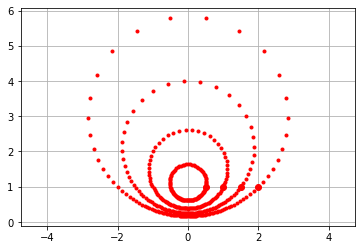

In [9]:
# illustrate iterates of mobius transform built from K(theta)
import numpy as np
import matplotlib.pyplot as plt

theta = np.pi/100    # build K(theta)
a = np.cos(theta)
b = np.sin(theta)
c = -b
d = a

for x in range(1,5):
    z = 0.5*x + 1j
    plt.plot(z.real,z.imag,'ro')

    for n in range(100):
        z = (a*z + b)/(c*z + d)
        plt.plot(z.real,z.imag,'r.')
    
plt.axis('equal')
plt.grid('on')

In what follows we first show that each M&ouml;bius Transformation takes
a circle or a line to a circle or a line.

The general equation for the circle and the line in the $(x,y)$ plane is

\begin{equation}
  A(x^2+y^2)+b_1x+b_2y+C=0 \label{eq:CLxy}
\end{equation}

where each constant is real. In order to make this more suitable to our
M&ouml;bius tranformations we invert $z=x+iy$ and $\ov z=x-iy$ for

\begin{equation*}
  x = (z+\ov z)/2 \and y = i(\ov z-z)/2.
\end{equation*}

These, together with $x^2+y^2=z\ov z$ and $B\equiv (b_1-ib_2)/2$, permit 
us to express (\ref{eq:CLxy}) as

\begin{equation}
  Az\ov z + Bz + \ov B\ov z + C = 0. \label{eq:CLz}
\end{equation}

Now if we set $w=\mu(z)$ then, recalling (\ref{eq:mobinv}), 

\begin{equation*}
  z=\mu^{-1}(w)=\frac{dw-b}{a-cw} \and \ov z = \frac{\ov d\ov w-\ov b}{\ov a-\ov c\ov w}.
\end{equation*}

On using these expressions for $z$ and $\ov z$ in (\ref{eq:CLz}), and clearing
fractions, we find

\begin{equation*}
  A(dw-b)(\ov d\ov w-\ov b)+B(dw-b)(\ov a-\ovc\ov w)+\ov B(\ov d\ov w-\ov b)(a-cw)+C(a-cw)(\ov a -\ov c\ov w) = 0.
\end{equation*}

Collecting terms brings

\begin{equation}
  \alpha w\ov w + \beta w + \ov\beta \ov w + \gamma = 0 \label{eq:CLw}
\end{equation}

where

\begin{equation*}
  \alpha = A|d|^2-2\Re(Bd\ov c)+C|c|^2, \hskip 0.25in
  \beta = -Ad\ov b+Bd\ov a+\ov B\ov b c - Cc\ov a, \hskip 0.25in
  \gamma = A|b|^2 - 2\Re(Bb\ov a) + C|a|^2. 
\end{equation*}

As $w=\mu(z)$ obeys (\ref{eq:CLw}) with real $\alpha$ and $\gamma$ we have
proven



\proclabel{mobCL}
 
\Prop\procref{mobCL}. Each M&ouml;bius transformation maps circles and lines onto
circles and lines.




Our interest here is in classifying M&ouml;bius Transformations via the nature
of their orbits. Namely by the properties of

\begin{equation}
  z_n = \mu(z_{n-1}) \label{eq:mobdyn}
\end{equation}

as $n\to\infty$. As in the continuous case we begin with the steady-state
solutions. In this case, if $z_n\to z_*$ then (\ref{eq:mobdyn}) implies that

\begin{equation*}
  z_* = \mu(z_*).
\end{equation*}

We call such a $z_*$ a  **Fixed Point**  of $\mu$.

As $\mu(\infty)=a/c$ we note that $\mu$ fixes $\infty$ iff $c=0$.
When $c=0$ we note that $d=1/a$ and that $\mu(z)=z$ requires $az+b = z/a$. 
This equation forks
two ways; if $a=\pm 1$ then $z=\infty$ is the only fixed point, 
while if $a\ne \pm 1$ then $z=ab/(1-a^2)$ is the second fixed point of $\mu$.

In the case that $c\ne 0$, the fixed point condition $\mu(z)=z$ 
is simply the quadratic equation $cz^2+(d-a)z-b=0$. Its roots,

\begin{equation}
  z_\pm = \frac{a-d\pm\sqrt{(\tr M)^2-4}}{2c}, \label{eq:mobfix}
\end{equation}

where $\tr M=a+d$ and $M$ is the 2-by-2 matrix associated with $\mu$,
are distinct when $(\tr M)^2\ne 4$. These observations in fact establish



\proclabel{Mobfix}

\Prop\procref{Mobfix}. Suppose $\mu$ is a M&ouml;bius Transformation with matrix
representation $M$. If $(\tr M)^2\ne 4$ then $\mu$ has two fixed points.
If $(\tr M)^2=4$ and $\mu$ is not the identity then $\mu$ has one fixed point.




As in the case of continuous dynamics we expect these fixed points 
(steady-states) to be either attracting or repelling or the center of
oscillations.

To begin, for $c\ne 0$ and $(\tr\,M)^2\ne 4$, $\mu$ has two distinct 
finite roots, $z_\pm$, per (\ref{eq:mobfix}). 
These roots are mapped to $0$ and $\infty$ by
the explicit M&ouml;bius Transformation

\begin{equation}
  \s(z) \equiv \frac{z-z_+}{z-z_-}. \label{eq:sig2sft}
\end{equation}

As the inverse of $\s$ therefore maps $0$ and $\infty$ to $z_\pm$ it follows
that

\begin{equation}
  \nu(z) \equiv \s(\mu(\s^{-1}(z))) \label{eq:numu1}
\end{equation}

fixes $0$ and $\infty$ and is therefore of a very simple form.
To see this we note that its associated matrix

\begin{equation}
  N = SMS^{-1} =
  \begin{pmatrix} 1 & -z_+ \\ 1 & -z_- \end{pmatrix}
  \begin{pmatrix} a & b \\ c & d \end{pmatrix}
  \frac{1}{z_+-z_-}\begin{pmatrix} -z_- & z_+ \\ -1 & 1 \end{pmatrix}
  = \begin{pmatrix} \la & 0 \\ 0 & 1/\la \end{pmatrix} \label{eq:numu2}
\end{equation}

is  **diagonal** , where 

\begin{equation}
  \la = \frac{\tr M + \sqrt{(\tr\,M)^2-4}}{2}. \label{eq:nulam0}
\end{equation}

It follows that $\nu$ is merely multiplication

\begin{equation}
  \nu(z) = \frac{\la z + 0}{0+1/\la} = \la^2 z.  \label{eq:nulam1}
\end{equation}

As such its orbits, $z_n=\nu(z_{n-1})=\la^{2n}z_0$, grow, decay or
oscillate as $|\la|$ is respectively greater than, less than, or equal to one.
To see how this facilitates study of the orbits of $\mu$
we simply invert (\ref{eq:numu1}) to go from

\begin{equation}
  z_n = \mu(z_{n-1}) \hskip 0.25in\hbox{to}\hskip 0.25in
  z_n = \s^{-1}(\nu(\s(z_{n-1})))=\s^{-1}(\la^{2n}\s(z_0)).
  \label{eq:nulam2}
\end{equation}

Hence, the orbits of $\mu$ are determined solely by powers of $\la^2$.

Although the situation when $c=0$ and $a\ne\pm 1$ is really just a special case
of the analysis above, it is worth spelling it out. In this case
the fixed points are
$z_+=ab/(1-a^2)$ and $z_-=\infty$ and so we
replace the fixed point shifter, (\ref{eq:sig2sft}), with the even simpler

\begin{equation*}
  \s(z) \equiv z-z_+.
\end{equation*}

It follows, as above, that $\nu(z) \equiv \s(\mu(\s^{-1}(z)))$
fixes $0$ and $\infty$ and is therefore merely multiplication.
In particular, as its associated matrix

\begin{equation*}
  N = SMS^{-1} =
  \begin{pmatrix} 1 & -z_+ \\ 0 & 1 \end{pmatrix}
  \begin{pmatrix} a & b \\ 0 & 1/a \end{pmatrix}
  \begin{pmatrix} 1 & z_+ \\ 0 & 1 \end{pmatrix} =
  \begin{pmatrix} a & 0 \\ 0 & 1/a \end{pmatrix}
\end{equation*}

it follows that $\nu(z)=a^2z$ and hence the
dynamics of $\mu$ are completely determined by $a$.

We consider then its polar expression $\la^2=r\exp(i\theta)$ and consider
the three distinct cases.



 The M&ouml;bius Transformation $\mu$ is called  **hyperbolic**  
when $\la^2=r>0$. %We may exclude $r=1$
It follows that if $z_0\ne z_\pm$ and $r>1$ then
$z_n\to\s^{-1}(\infty)=z_-$ and hence $z_-$ is attracting while
$z_+$ is repelling. Similarly, if $r<1$ then
$z_n\to\s^{-1}(0)=z_+$ and so now $z_+$ is attracting while
$z_-$ is repelling.  
Given (\ref{eq:nulam0}) we should be able to
state necessary and sufficient conditions on $\tr\,M$ for $\la^2=r$.
From (\ref{eq:numu2}) it follows that
$\tr\,M=\tr\,N=\la+1/\la$. Squaring this expression brings

\begin{equation}
  (\tr\,M)^2=2+\la^2+1/\la^2. \label{eq:latrM}
\end{equation}

Now, if $\la^2=r>0$ then $(\tr,M)^2$ is real and bounded below by 4 (for 
$r+1/r\ge 2$ when $r>0$). Hence, if $\mu$ is hyperbolic then $\tr\,M\in\maR$
and $|\tr\,M|>2$. We illustrate this case by plotting orbits of

\begin{equation}
  \mu_H(z) = \frac{z+1}{z+2} \label{eq:muH}
\end{equation}

in \fig\figref{mobius}(A).



 The M&ouml;bius Transformation $\mu$ is called  **elliptic**  
when $\la^2=\exp(i\theta)$.
In this case we note that $\la^{2n}\s(z_0)=\exp(2ni\theta)\s(z_0)$ does not
converge but that each iterate lies on the circle of radius $|\s(z_0)|$.
As $\s^{-1}$ takes circles to circles it follows that each $z_n$ lies on a
circle (centered at $z_+$ or $z_-$). If $\mu$ is elliptic then (\ref{eq:latrM})
requires that

\begin{equation}
  (\tr\,M)^2=2+\exp(i\theta)+\exp(-i\theta)=2+2\cos(\theta), \label{eq:latrME}
\end{equation}

from which we deduce that $\tr\,M\in\maR$ and $|\tr\,M|<2$.
We have illustrated this case by plotting orbits of

\begin{equation}
  \mu_E(z) = \frac{z/2-1/2}{z+1} \label{eq:muE}
\end{equation}

in \fig\figref{mobius}(C).  



 The M&ouml;bius Transformation $\mu$ is called  **loxodromic**  
when $\la^2=r\exp(i\theta)$ where $r>0$, $r\ne 1$ and $\theta\ne 2k\pi$.
In this case (\ref{eq:latrM}) reads

\begin{equation*}
  (\tr\,M)^2 = 2 + (r+1/r)\cos(\theta)+i(r-1/r)\sin(\theta).
\end{equation*}

The right hand side is not real unless $\theta=\pi$. In this case we find
$(\tr\,M)^2=2-(r+1/r)<0$ (as $r+1/r>2$). Hence, if $\mu$ is loxodromic
then $\tr\,M\not\in\maR$.
We have illustrated this case by plotting orbits of

\begin{equation}
  \mu_L(z) = \frac{(1-5i)z+1}{z+1-5i} \label{eq:muL}
\end{equation}

in \fig\figref{mobius}(C).  



Finally, if $\tr\,M=\pm$ then, by (\ref{eq:mobfix}), $\mu$ has the single 
fixed point $(a-d)/(2c)$. We use

\begin{equation*}
  \s(z) \equiv \frac{1/c}{z-(a-d)/(2c)}
\end{equation*}

to send it to $\infty$ so that $\nu(z) \equiv \s(\mu(\s^{-1}(z)))$
fixes $\infty$. The associated matrix

\begin{equation*}
  N = SMS^{-1} =
  \begin{pmatrix} 0 & 1/c \\ 1 & (d-a)/(2c) \end{pmatrix}
  \begin{pmatrix} a & b \\ c & d \end{pmatrix}
  \begin{pmatrix} (a-d)/2 & 1 \\ c & 0 \end{pmatrix}
  = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}
\end{equation*}

is what we called a  **Jordan Block** in \S\subsecref{nilp} .
\index{Jordan Block} It follows that $\nu(z)=z+1$ and that the
dynamics of $\mu$ come down to 

\begin{equation*}
  z_n=\mu(z_{n-1})=\s^{-1}(\nu(\s(z_{n-1})))=\s^{-1}(\s(z_0)+n)
  \to \s^{-1}(\infty) = (a-d)/(2c).
\end{equation*}

This shows that the lone fixed point is attracting. 
M&ouml;bius transformations with $\tr\,M=\pm 2$ are deemed  **parabolic** .
We have illustrated this case by plotting orbits of

\begin{equation}
  \mu_P(z) = \frac{z}{z+1} \label{eq:muP}
\end{equation}

in \fig\figref{mobius}(D).



\centerline{\psfig{figure=c7/MobL.eps,width=2.3in}\hskip 0.25in
            \psfig{figure=c7/MobE.eps,width=2.3in}
            \psfig{figure=c7/MobFieldP.eps,width=2.3in} }
\centerline{\psfig{figure=c7/MobFieldHout.eps,width=3in}\hskip 0.25in
            \psfig{figure=c7/MobFieldHin.eps,width=3in}}
\figlabel{mobius}
\Fig\figref{mobius}. Orbits of the four types of M&ouml;bius Transformations.



To summarize, we have established necessary conditions on the trace of $M$, 
the matrix associated with a M&ouml;bius transformation, $\mu$, for $\mu$ to
be of 1 of 4 types. As these conditions are mutually exclusive they must
in fact be sufficient. As a result, we have established the fundamental
classification of M&ouml;bius transformations.



\proclabel{mobtype}

\Prop\procref{mobtype}. The M&ouml;bius transformation $\mu$ is \hfil\break
Hyperbolic iff $\tr\,M\in\maR$ and $|\tr\,M|>2$, \hfil\break
Elliptic iff $\tr\,M\in\maR$ and $|\tr\,M|<2$, \hfil\break
Parabolic iff $\tr\,M\pm 2$, \hfil\break
Loxodromic iff $\tr\,M\not\in\maR$.




We will return to this classification in our work in Chapters \secref{mg} and
\secref{rt} on matrix groups and representation theory.
For now, we wish to emphasize that we have also, en route, classified 
2-by-2 matrices,
with determinant equal to one. To make this precise we need to recall that
when $N=SMS^{-1}$ we call $S$ a  **similarity transform** 
and say that $N$ and $M$ are  **similar**. \index{similar} 
\index{similarity transform} 

To summarize, we have shown that if $(\tr\,M)^2=4$ then $M$ is similar to

\begin{equation}
  \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix} 
  \hskip 0.25in\hbox{else}\ M\ \hbox{is similar to}\hskip 0.25in
  \begin{pmatrix} \la & 0 \\ 0 & 1/\la \end{pmatrix}. \label{eq:mobunpar}
\end{equation}

This condition $(\tr\,M)^2=4$ can be seen as a degeneracy condition.
Our main spectral result will say that each nondegenerate matrix is
similar to a diagonal matrix, and that each degenerate matrix is similar
to a diagonal matrix plus a nilpotent matrix.

\begin{exercise}\label{ex:MobCL} If $A\ne 0$ and $|B|^2>AC$ show that (\ref{eq:CLz}) is
equivalent to $|z-z_0| = r$. Find $z_0$ and show that $r>0$. % L Ford
Use this to show that $\mu(z)=1/(z+2)$ takes the circle centered at zero
of radius one to the circle centered at $2/3$ of radius $1/3$.
\end{exercise}

\begin{exercise}\label{ex:cayleymap} Show that the  **Cayley Map** \index{Cayley Map} 

\begin{equation}
  \kappa(z) \equiv \frac{z-i}{z+i} \label{eq:CayleyMapD}
\end{equation}

takes the real line to the unit circle and the upper half plane to the interior of the unit circle.
Reproduce \fig\figref{CayleyMap}.
\end{exercise}

\centerline{\psfig{figure=c7/CayleyMap.eps,width=3in}
                \psfig{figure=c7/Schottky2.eps,width=3in}}
\figlabel{CayleyMap}
\Fig\figref{CayleyMap}. (A) The image of three horizontal lines under the Cayley Map (\ref{eq:CayleyMapD}).
 *CayleyMap.m} (B) The first step in the Schottky dance of maps and disks in  Exer.~\ref{ex:circlepairing}  .
 *Schottky2.m*  

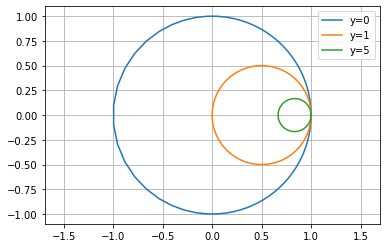

In [19]:
# Cayley Map, Map three horizontal lines

x = np.linspace(-1000, 1000, 20000)
Y = [0, 1, 5]

for y in Y:
    z = x + 1j*y
    Z = (z-1j)/(z+1j)
    plt.plot(Z.real,Z.imag)

plt.axis('equal')
plt.legend(['y=0','y=1','y=5'])
plt.grid('on')

\begin{exercise}\label{ex:circlepairing} Show that

\begin{equation*}
   \mu(z) = \frac{r_1r_2}{z-c_1} + c_2
\end{equation*}

takes $C_{r_1}(c_1)$ to $C_{r_2}(c_2)$, mapping the interior of the first to the exterior of the second, and *vice versa*.
In this case we say that $\mu$ **pairs** these two circles. It follows that $\mu^{-1}$ pairs $C_{r_2}(c_2)$ and $C_{r_1}(c_1)$.

Let $s=\sqrt 2$ and show that

\begin{equation*}
 \mu_a(z) = \frac{s z + i}{-iz + s}
\end{equation*}

pairs $C_a\equiv C_1(is)$ and $C_A \equiv C_1(-is)$ while

\begin{equation*}
 \mu_b(z) = \frac{s z + 1}{z + s}
\end{equation*}

pairs $C_b \equiv C_1(s)$ and $C_B \equiv C_1(-s)$. 
\end{exercise}

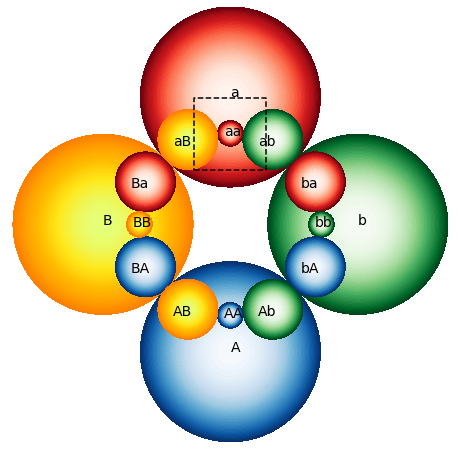

In [10]:
# Plot 4 theta-Schottky disks with theta = pi/4
# along with their images under 2 pair of mobius maps,
# where each pair of maps "pair" a pair of disks
#
# Based on Figure 4.4 in Indra's Pearls by Mumford, Series & Wright

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

def PlotCirc(Cc, Cr, colormap): 
    x0 = np.real(Cc)                  
    y0 = np.imag(Cc)
    r = np.linspace(0, Cr, 50)
    a = np.linspace(0, 2*np.pi, 500) 
    R, A = np.meshgrid(r,a)
    X = x0 + R*np.cos(A)
    Y = y0 + R*np.sin(A)
    Z = (X-x0)**2 + (Y-y0)**2 
    plt.contourf(X, Y, Z, 40, cmap=colormap)
    
def MobiusOnCircle(T, Cc, Cr):  # Box 10, page 91, Indra
    z = Cc - Cr**2/np.conjugate(T[3]/T[2] + Cc)
    Dc = MobiusOnPoint(T, z)
    Dr = abs(Dc - MobiusOnPoint(T, Cc+Cr))
    return Dc, Dr

def MobiusOnPoint(T, z):
    return (T[0]*z + T[1])/(T[2]*z + T[3])

fig = plt.figure(figsize=(8,8))

theta = np.pi/4   # build the maps and circles, 
s = np.sin(theta)  # from Project 4.2, page 118, Indra
c = np.cos(theta)

a = np.array([[1, 1j*c],[-1j*c, 1]])/s
avec = np.reshape(a, (4,))
A = inv(a)
Avec = np.reshape(A, (4,))

b = np.array([[1, c], [c, 1]])/s
bvec = np.reshape(b, (4,))
B = inv(b)
Bvec = np.reshape(B, (4,))

gens = np.array([avec, bvec, Avec, Bvec])  
invind = np.array([2, 3, 0, 1])     # indicies of inverses in gens

r = 1./np.cos(theta)
Ccenb = r 
Crb = np.tan(theta) 
Ccena = 1j*r 
Cra = np.tan(theta) 
CcenB = -r 
CrB = np.tan(theta) 
CcenA = -1j*r 
CrA = np.tan(theta) 

circ = np.array([[Ccena, Cra], [Ccenb, Crb], [CcenA, CrA], [CcenB, CrB]])

colormap = ['Reds', 'Greens', 'Blues', 'Wistia']
name = ['a', 'b', 'A', 'B']

for j in range(4):   # draw initial disks
    PlotCirc(circ[j,0], circ[j,1], colormap[j]) 
    plt.text(np.real(circ[j,0]), np.imag(circ[j,0]), name[j], fontsize = 14)
  
for j in range(4): # draw next generation
    for k in range(4):
        if k != invind[j]:
            G = gens[k,:]
            [Dcen, Drad] = MobiusOnCircle(G, circ[j,0], circ[j,1])
            PlotCirc(Dcen, Drad, colormap[j])
            plt.text(np.real(Dcen)-Drad/2, np.imag(Dcen)-Drad/5, name[k]+name[j], fontsize = 14)

plt.plot([-.4, .4, .4, -.4, -.4],[0.6, 0.6, 1.4, 1.4, 0.6], 'k--')
plt.axis('equal')
plt.axis('off');

\begin{exercise}\label{ex:schottky}  Generalize  *Schottky2.m*   to follow 6 more steps of the Schottky dance and
arrive at \fig\figref{SchottkyDance}
\end{exercise}

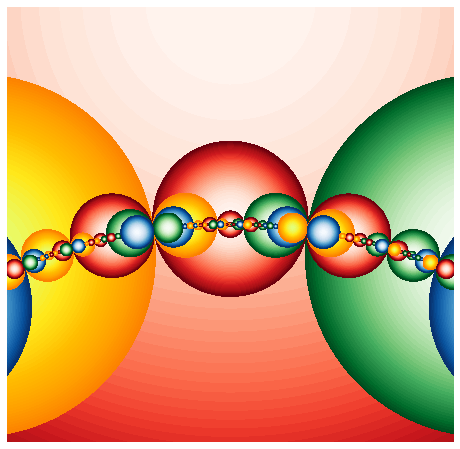

In [7]:
# Breadth First Search, Box 12, page 115
%matplotlib inline

fig = plt.figure(figsize=(8,8))

bigN = 400
group = np.zeros((4,bigN), dtype=complex)
tag = np.zeros(bigN, dtype=int)
levmax = 4
num = np.zeros(levmax+1, dtype=int)

for j in range(4):
    group[:,j] = gens[j,:]
    tag[j] = j
    PlotCirc(circ[j,0], circ[j,1], colormap[j]) 
    
num[0] = 0
num[1] = 4

for lev in range(1,levmax):
    inew = num[lev]
    for iold in range(num[lev-1], num[lev]):
        for j in range(4):
            if j != invind[tag[iold]]:
                group[:,inew] = np.reshape(np.reshape(group[:,iold],(2,2))@np.reshape(gens[j,:],(2,2)), (4,))
                #print(f'iold = {iold}, j = {j}, group[:,{inew}] = {group[:,inew]}')
                tag[inew] = j
                inew = inew + 1
    num[lev+1] = inew

    
for i in range(num[levmax]):
    for j in range(4):
        if j != invind[tag[i]]:
            Ncen, Nrad = MobiusOnCircle(group[:,i], circ[j,0], circ[j,1]) 
            PlotCirc(Ncen, Nrad, colormap[j])
            
plt.axis('equal')
plt.xlim(-0.4,0.4)
plt.ylim(0.6, 1.4)
plt.axis('off');

\figlabel{SchottkyDance}
\Fig\figref{SchottkyDance}. (A) The first 6 steps of the Schottky Dance (B) Zoom into small rectangle in
panel (A).
 *SchottkyDance.m*  

\begin{exercise}\label{ex:fpeig} Consider a M\"obius transformation, $\mu$, and its
associated matrix $M$. Show that $z=[z_1; z_2]$ is an eigenvector of $M$
iff $z_1/z_2$ is a fixed point of $\mu$.
\end{exercise}

## Fourier Series*

The complex exponential is fundamental to the two central "transforms" of 
modern science, those named after Fourier and Laplace. We pause here to 
develop the key properties of Fourier Series and Transforms.

We observed in \S\subsecref{dmech} that a mechanical system with 2 degrees 
of freedom vibrates at 2 characteristic frequencies. One of the
most common applications of Fourier tools is to the problem of spectral 
analysis, i.e., the determination of the spectral or frequency components of
a signal.

Most everything follows from the fact that $\exp(2\pi i m t)$ is
"orthogonal" to $\exp(2\pi i nt)$ in the sense that,
for integers $m$ and $n$,

\begin{equation}
  \int_0^1 \exp(2\pi int) \exp(-2\pi imt) \,dt 
   = \int_0^1 \exp(2\pi i(n-m)t) \,dt = \begin{cases} 0 & \hbox{if}\ m\ne n, \\
         1 & \hbox{if}\ m=n. \end{cases} \label{eq:exporth}
\end{equation} 
 
The key idea is now to use these orthonormal exponentials as a basis for
a class of functions defined on $0\le t\le 1$. More precisely, given
a function $f$ we develop it in a  **Fourier Series** 

\begin{equation}
  f(t) = \sum_{n=-\infty}^\infty \hat f(n)\exp(2 \pi int). \label{eq:fourser}
\end{equation}

To determine the Fourier coefficients, $\hat f(m)$,
multiply each side of (\ref{eq:fourser}) by $\exp(-2 \pi imt)$ then 
integrate and invoke (\ref{eq:exporth}):

\begin{equation}
  \hat f(m) = \int_0^1 f(t)\exp(-2 \pi imt) \,dt.  \label{eq:fourcoeff}
\end{equation}

For example, if 

\begin{equation}
  f(t) = t \hskip 0.25in\hbox{then}\hskip 0.25in
  \hat f(0) = \frac{1}{2} \and \hat f(n) = \frac{i}{2\pi n}, \hskip 0.25in |n|>0,
  \label{eq:fourex1}
\end{equation}

while if 

\begin{equation}
  f(t)=t(1-t) \hskip 0.25in\hbox{then}\hskip 0.25in
  \hat f(0) = \frac{1}{6} \and \hat f(n) = \frac{-1}{2(n\pi)^2}, \hskip 0.25in |n|>0.
  \label{eq:fourex2}
\end{equation}

We speak of $\hat f(m)\exp(2\pi i m t)$ as the projection of $f$ onto
$\exp(2\pi i m t)$ and so interpret $\hat f(m)$ as the "amount" of 
$f$ at frequency $m$. Regarding the sense of "negative frequency" we note 
that if $f$ is real then 
$\hat f(-n) = \ov{\hat f(n)}$ and so (\ref{eq:fourser}) takes the form

\begin{equation}
  f(t) = \hat f(0) + 2\sum_{n=1}^\infty \Re\{\hat f(n)\exp(-2\pi i n t)\}.
   \label{eq:fourreal}
\end{equation}

This in turn suggests that we write

\begin{equation}
  \eqalign{\hat f(m) = \int_0^1 f(t)\exp(-2 \pi imt) \,dt 
  &= \int_0^1 f(t)(\cos(2 \pi mt)-i\sin(2\pi mt)) \,dt \cr 
  &= 2(\hat f_c(m) - i \hat f_s(m)) \cr} \label{eq:fourcoeffcossin}
\end{equation}

where

\begin{equation*}
  \hat f_c(m) = \frac{1}{2}\int_0^1 f(t)\cos(2 \pi mt)\,dt \and
  \hat f_s(m) = \frac{1}{2}\int_0^1 f(t)\sin(2\pi mt) \,dt, \hskip 0.25in m=1,2,\ldots
\end{equation*}

In which case (\ref{eq:fourreal}) becomes

\begin{equation}
  f(t) = \hat f_0 + \sum_{n=1}^\infty \hat f_c(n)\cos(2\pi nt) +
                                      \hat f_s(n)\sin(2\pi nt).
   \label{eq:fourreal2}
\end{equation}

Returning to our two examples, we find

\begin{equation}
  t = \frac{1}{2}-\sum_{n=1}^\infty \frac{\sin(2\pi n t)}{n\pi}  \and
  (1-t)t = \frac{1}{6}-\sum_{n=1}^\infty \frac{\cos(2\pi n t)}{n^2\pi^2}. 
   \label{eq:fourexsc}
\end{equation}

It is very instructive to visually interrogate the convergence of these sums
by graphing the partial sums

\begin{equation}
  S_N(t) \equiv \hat f_0 + \sum_{n=1}^N \hat f_c(n)\cos(2\pi nt) +
                         \hat f_s(n)\sin(2\pi nt) \label{eq:fourserN}
\end{equation}

for increasing values of $N$.

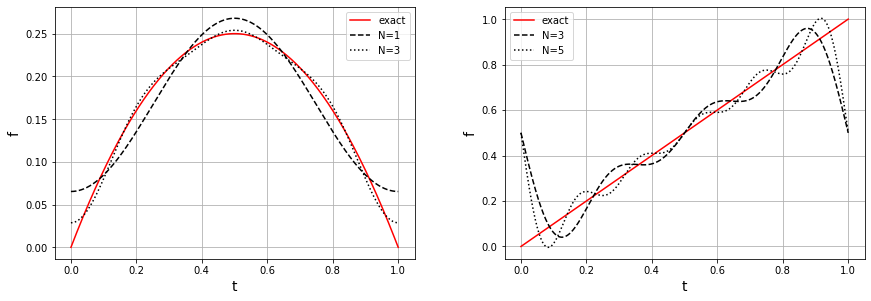

In [6]:
# Two Fourier Series
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

t = np.linspace(0,1,1000)
f = t*(1-t)
f0 = 1/6
pi = np.pi
f1 = -1/pi**2
f2 = f1/4
f3 = f1/9
ax1.plot(t,f,'r',linewidth=1.5)
F1 = f0 + f1*np.cos(2*pi*t)
F2 = F1 + f2*np.cos(4*pi*t)
F3 = F2 + f3*np.cos(6*pi*t)
ax1.plot(t,F1,'k--',linewidth=1.5)
ax1.plot(t,F3,'k:',linewidth=1.5)
ax1.grid('on')
ax1.legend(['exact','N=1','N=3'])
ax1.set_xlabel('t',fontsize=14)
ax1.set_ylabel('f',fontsize=14)

f = t
f0 = 1/2
f1 = -1/pi
f2 = f1/2
f3 = f1/3
f4 = f1/4
f5 = f1/5
ax2.plot(t,f,'r',linewidth=1.5)
F1 = f0 + f1*np.sin(2*pi*t)
F2 = F1 + f2*np.sin(4*pi*t)
F3 = F2 + f3*np.sin(6*pi*t)
F4 = F3 + f4*np.sin(8*pi*t)
F5 = F4 + f5*np.sin(10*pi*t)
ax2.plot(t,F3,'k--',linewidth=1.5)
ax2.plot(t,F5,'k:',linewidth=1.5)
ax2.grid('on')
ax2.legend(['exact','N=3','N=5'])
ax2.set_xlabel('t',fontsize=14)
ax2.set_ylabel('f',fontsize=14);

\begin{myfig} \label{example:fourierex} 
(Left) The exact $f(t)=t(1-t)$ and two of its 
low frequency (\ref{eq:fourserN}) Fourier approximants.
(Right) The exact $f(t)=t$ and two of its 
low frequency  (\ref{eq:fourserN}) Fourier approximants.
\end{myfig}



This visual inspection suggests that we are on the right track. It does not establish the
convergence alleged in (\ref{eq:fourser}). In fact that convergence is a very touchy subject.
In particular, although

\begin{equation*}
   S_N = \sum_{n=-N}^N \hat f_n\exp(2\pi int)
\end{equation*}

need not converge we can show that their averages

\begin{equation*}
  \s_N = \frac{1}{N+1}\sum_{j=0}^N S_j
\end{equation*}

do. To begin, we note that

\begin{equation*}
\eqalign{\s_N 
  &= \frac{1}{N+1}\sum_{j=0}^N \sum_{n=-j}^j \hat f_n\exp(2\pi int) \cr
  &= \frac{1}{N+1}\sum_{j=0}^N\sum_{k=0}^N \hat f_{j-k}\exp(2\pi i(j-k)t) \cr
  &= \sum_{n=-N}^N\frac{N+1-|n|}{N+1}\hat f_n\exp(2\pi int) \cr}
\end{equation*}

by (\ref{eq:perid})
and so 

\begin{equation*}
  \eqalign{\s_N 
  &= \sum_{n=-N}^N \frac{N+1-|n|}{N+1}\exp(2\pi int)\int_0^1 f(x)\exp(-2\pi inx)\,dx \cr
  &= \int_0^1 f(x)\sum_{n=-N}^N \frac{N+1-|n|}{N+1}\exp(2\pi in(t-x))\,dx \cr
  &= \int_0^1 f(x)K_N(t-x)\,dx \cr}
\end{equation*}

where the kernel $K_N$ enjoys, again invoking (\ref{eq:perid}),

\begin{equation}\label{eq:KNprop}
  \eqalign{K_N(s) 
  &= \frac{1}{N+1}\sum_{n=-N}^N (N+1-|n|)\exp(2\pi ins) \cr
  &= \frac{1}{N+1}\sum_{j=0}^N\sum_{k=0}^N \exp(2\pi i(j-k)s) \cr
  &= \frac{1}{N+1}\sum_{j=0}^N\exp(2\pi ijs)\sum_{k=0}^N \exp(-2\pi iks) \cr
  &= \frac{1}{N+1}\frac{1-\exp(2\pi i(N+1)s)}{1-\exp(2\pi is)}
                            \frac{1-\exp(-2\pi i(N+1)s)}{1-\exp(-2\pi is)}\cr
  &= \frac{1}{N+1}\frac{2-2\cos(2\pi (N+1)s)}{2-2\cos(2\pi s)} \cr
  &= \frac{1}{N+1}\frac{\sin^2(\pi (N+1)s)}{\sin^2(\pi s)}. \cr}
\end{equation}

We illustrate it in Figure \ref{example:fejer}

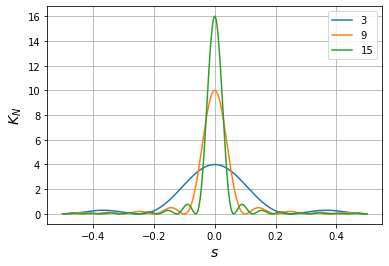

In [15]:
# Build and plot the Fejer Kernel for 3 values of N

s = np.linspace(-0.5,0.5,999)

Nlist = [3, 9, 15]
for N in Nlist:
    K = ((np.sin(np.pi*(N+1)*s)/np.sin(np.pi*s))**2)/(N+1)
    plt.plot(s,K,linewidth=1.5)

plt.grid('on')
plt.legend(Nlist)
plt.xlabel('$s$',fontsize=14)
plt.ylabel('$K_N$',fontsize=14);

\begin{myfig} \label{example:fejer}
The Fejer kernel at three values of $N$. 
\end{myfig}



This is a delta sequence in the sense that

$K_N(s)\ge 0$

$K_N(s)\to 0$ uniformly outside $[-h,h]$ for each $h>0$.


\begin{equation*}
   \int_{-1/2}^{1/2} K_N(s)\,ds 
   = \frac{1}{N+1} \sum_{n=-N}^N (N+1-|n|)\int_{-1/2}^{1/2}\exp(2\pi ins) \,ds = 1
\end{equation*}

for each integral is zero except when $n=0$. We may now prove


\begin{proposition}\label{prop:fejer}
 **Fej\'er's Theorem** . If $f$ is continuous on $[0,1]$ then $\s_N\to f$.
\end{proposition}

**Proof:** We write

\begin{equation*}
  \eqalign{|f(t)-\s_N(t)| &=
  \left|f(t)-\int_0^1 K_N(t-s)f(s)\,ds\right| = \left|\int_0^1 K_N(t-s)f(t)\,ds-\int_0^1 K_N(t-s)f(s)\,ds\right| \cr
  &= \left|\int_0^1 K_N(t-s)(f(t)-f(s))\,ds \right| \le \int_0^1 K_N(t-s)|f(t)-f(s)|\,ds\cr}
\end{equation*}

Now given $\eps>0$ and $|f|\le M$ choose $N>0$ such that

\begin{equation*}
  \eqalign{\int_0^1 K_N(t-s)|f(t)-f(s)|\,ds
  &= \int_{|t-s|\le \delta} K_N(t-s)|f(t)-f(s)|\,ds + \int_{|t-s|>\delta} K_N(t-s)|f(t)-f(s)|\,ds \cr
  &\le (\eps/2)\int_{|t-s|\le \delta} K_N(t-s)\,ds + (\eps/2)\int_{|t-s|>\delta} |f(t)-f(s)|\,ds \cr}
\end{equation*}

**End of Proof.**



In other words, the trigonometric polynomials are dense in $C[0,1]$.

\begin{proposition}\label{prop:trigPdense}
If $f\in C[0,1]$ and $\eps>0$ then there exists a trigonometric polynomial
$T$ such that $|f(t)-T(t)|<\eps$ for every $t\in[0,1]$.
\end{proposition}

If we ask for less we get more. Consider mean-square measure...

We may also view the Fourier Coefficients, (\ref{eq:fourcoeff}), as
a solution to the least squares problem

\begin{equation*}
   \min_{c\in\maC^{N+1}} \int_0^1\left| f(t)-\sum_{n=0}^Nc_n\exp(2\pi int)\right|^2\,dt.
\end{equation*}

(a) Show that

\begin{equation*}
  \eqalign{\left| f(t) - \sum_{n=0}^Nc_n\exp(2\pi int)\right|^2
  &= |f(t)|^2 - 2\Re\left(f(t)\sum_{n=0}^N\ov c_n\exp(-2\pi int)\right) + \cr
  &\hskip 0.25in \sum_{n=0}^Nc_n\exp(2\pi int)
   \sum_{m=0}^N\ov c_m\exp(-2\pi imt). \cr}
\end{equation*}

(b) Next use orthogonality, (\ref{eq:exporth}, and \Eqref{fourcoeff}) to justify

\begin{equation*}
   \eqalign{\int_0^1\left| f(t)-\sum_{n=0}^Nc_n\exp(2\pi int)\right|^2\,dt 
  &= \int_0^1 |f(t)|^2\,dt - 2\Re\sum_{n=0}^N\ov c_n\hat f(n) +
          \sum_{n=0}^N|c_n|^2 \cr
  &= \int_0^1 |f(t)|^2\,dt + \sum_{n=0}^N\{|c_n|^2-2\Re(\ov c_n\hat f(n))\}. \cr}
\end{equation*}

(c) Note that orthogonality has decoupled the $n$-dimensional optimization problem
into $n$ 1-dimensional problems and that each of these is a copy of (\ref{eq:1dopt}). 
Conclude that $c_n=\hat f(n)$ and that

\begin{equation*}
  \min_{c\in\maC^{N+1}} \int_0^1\left| f(t)-\sum_{n=0}^Nc_n\exp(2\pi int)\right|^2\,dt
  = \int_0^1 |f(t)|^2\,dt - \sum_{n=0}^N|\hat f(n)|^2.
\end{equation*}

This latter is often expressed as \index{Bessel's Inequality}

\begin{proposition}\label{prop:besselineq} **Bessel's Inequality** . If $f\in C[0,1]$ then 

\begin{equation}
  \sum_{n=0}^N|\hat f(n)|^2 \le \int_0^1 |f(t)|^2\,dt \label{eq:Besselineq}
\end{equation}

for every $N\ge 0$.
\end{proposition}

We may now prove


\begin{proposition}\label{prop:fejer2}If $f\in C[0,1]$ then the Fourier series converges in the mean-square sense

\begin{equation*}
  \int_0^1|f(t)-S_N(t)|^2\,dt \to 0
\end{equation*}

and $f$ enjoys  **Parseval's Equality** \index{Parseval's Equality} 

\begin{equation}
   \sum_{n=0}^\infty |\hat f(n)|^2 = \int_0^1 |f(t)|^2\,dt \label{eq:Parsevaleq}
\end{equation}

\end{proposition}

**Proof:** Given $\eps>0$ we can find a trigonometric polynomial

\begin{equation*}
  P(t) = \sum_{j=-m}^m a_j\exp(2\pi i j t)
\end{equation*}

for which $|P(t)-f(t)|<\eps/2$ for every $t\in[0,1]$. 
Now, if $N\ge m$ then $S_N(P)=P$ (exercise?) and so

\begin{equation*}
  \eqalign{\|f-S_N\|_2 &= \|f-S_N f-P+P\|_2 =  \|f-S_N f-P+S_NP\|_2 \cr
  & \le \|P-f\|_2 + \|S_N(f-P)\|_2 \le 2\|P-f\|_2 < \eps \cr}
\end{equation*}

thanks to Minkowski's Inequality (\ref{eq:Minkowski}) and 
Bessel's Inequality (\ref{eq:Besselineq}). 

Finally, by Bessel and reverse Minkowski, we sandwich

\begin{equation*}
  0\le \|f\|_2-\|S_N f\|_2 \le \|f-S_N f\|_2 
\end{equation*}

we get Parseval. **End of Proof.**

\begin{exercise}\label{ex:Weierstrass} Use \prop\procref{trigPdense} and the Taylor expansion of $\exp$ to arrive at
 **Weierstrass' Theorem.**  If $f\in C[0,1]$ and $\eps>0$ then there exists a polynomial $p$ such that
$|f(t)-p(t)|<\eps$ for every $t\in[0,1]$. \index{Weierstrass' Theorem}
\end{exercise}

\begin{exercise}\label{ex:BesselPoly} Our proof of Bessel's Inequality (\ref{eq:Besselineq}) really only uses
orthonormality. Suppose that $\{q_n\}$ is an orthonormal sequence in $[a,b]$.

 (a) Show that

\begin{equation*}
  \min_{c\in\maC^{N+1}} \int_0^1\left| f(t)-\sum_{n=0}^Nc_n q_n(t)\right|^2\,dt
  = \int_0^1 |f(t)|^2\,dt - \sum_{n=0}^N|\ip{f}{q_n}|^2.
\end{equation*}

(b) Use (a) and the previous exercise to show that if $f\in C[0,1]$ then

\begin{equation*}
  \int_0^1\left| f(t)-\sum_{n=0}^N\ip{f}{q_n}q_n(t)\right|^2\,dt \to 0.
\end{equation*} 
 
\end{exercise}

## Fourier Analysis of Stationary Processes*

We use the sequence of covariances of a stationary time series as Fourier coefficients of a spectral density function. We show that this function in nonnegative and so serves as a natural weight function. We solve the prediction problem in terms of the polynomials orthogonal with respect to this weight.

To begin, we suppose that $\{x_k\}$ is a time series over the event space $\Omega$ with probability density function $p$. We suppose that this time series is stationary in the sense that each covariance

\begin{equation} \label{eq:Cov0}
  c_{j,k} \equiv \int_\Omega x_j(\om)\ov x_k(\om) p(\om)\,d\om
\end{equation}

depends only on the difference of the indicies. More precisely, we assume

\begin{equation}\label{eq:Cov1}
  c_{j,k} = c_{j+m,k+m} = c_{j-k} \hskip 0.25in \forall m\in\maZ
\end{equation}

We note that it follows from (\ref{eq:Cov0}) that

\begin{equation}\label{eq:}
   c_{-j} = \ov c_j
\end{equation}

With all this we may write

\begin{equation}\label{eq:ToepF0}
  \left\|\sum_{j=0}^n u_jx_j\right\|^2_{L^2(\Omega, p)} = \int_\Omega \sum_{j=0}^n u_jx_j(\om)\sum_{k=0}^n \ov u_k\ov x_k(\om) p(\om)\,d\om =
  u^*T_nu = \sum_{j=0}^n\sum_{k=0}^n u_jc_{j-k}\ov u_k
\end{equation}

Where $T_n$ is the Toeplitz matrix

\begin{equation}\label{eq:ToepMat}
  T_n = \begin{pmatrix} c_0 & c_1 & \cdots & c_{n-1} & c_n \\
                      \ov c_1 & \ddots & \ddots & \ddots & c_{n-1} \\
                     \vdots & \ddots & \ddots & \ddots & \vdots \\
                      \ov c_{n-1} & \ddots & \ddots & \ddots & c_1 \\
                      \ov c_n & \ov c_{n-1} & \cdots & \ov c_1 & c_0 \end{pmatrix}
\end{equation}

As the left-hand side of (\ref{eq:ToepF0}) is nonnegative we see that each $T_n$ is positive semidefinite.

We now construct the **Spectral Density** via

\begin{equation}\label{eq:SpecDen}
  w(t) = \sum_{n=-\infty}^\infty c_n \exp(2\pi i nt) 
\end{equation}

As,

\begin{equation}\label{eq:SpecDenc}
 c_n = \int_0^1 w(t)\exp(-2\pi i nt) \,dt
\end{equation}

We note that (\ref{eq:ToepF0}) takes the form

\begin{equation}\label{eq:ToepF1}
 u^*T_nu = \int_0^1\left|\sum_{k=0}^n u_k\exp(2\pi ikt)\right|^2 w(t)\,dt
\end{equation}

Now, this being nonnegative for every $u\in\maC^{n+1}$ will imply that $w(t)\ge 0$ for every $t\in[0,1]$.

\begin{proposition}\label{prop:Bochner}
If $\{c_j\}$ is the sequence of covariances of a stationary time series and 

\begin{equation}\label{eq:cjell1}
  \sum_{j=-\infty}^\infty |c_j| < \infty
\end{equation}

then its **Spectral Density**, $w$ in (\ref{eq:SpecDen}), is continuous and nonnegative.

\end{proposition}

**Proof:** We first show that $w$ is continuous. As each
$t\mapsto\exp(2\pi ij t)$ is countinuous and

\begin{equation*}
  \max_{0\le t\le 1}|c_j\exp(2\pi ij t)| = |c_j|
\end{equation*}

it follows from (\ref{eq:cjell1}) and the Weierstrass M-Test (see $\S$1.3) that (\ref{eq:SpecDen}) converges to a continuous function $w$.

We now argue that $w$ is nonnegative. To see that we choose $u$ to give us a Fejer kernel. In particular if

\begin{equation}\label{eq:Fejeruk}
  u_k = \frac{\exp(-2\pi i k t_0)}{(n+1)^{1/2}}
\end{equation}

then, following (\ref{eq:KNprop}), we find

\begin{equation}\label{eq:ToepF2}
 \left|\sum_{k=0}^n u_k\exp(2\pi ikt)\right|^2 = K_n(t-t_0)
\end{equation}

and so

\begin{equation}\label{eq:SDwpos}
  u^*T_nu = \int_0^1 K_n(t-t_0)w(t)\,dt \to w(t_0)\ge 0.
\end{equation}

**End of Proof.**

We now use the Spectral Density to solve the **prediction** problem of finding the best (in the mean-squared sense) linear combination of $n$ recorded samples. More precisely, we solve

\begin{equation}\label{eq:predsetup}
  \min_{u\in\maC^n}\left\|x_1 - \sum_{j=0}^{n-1} u_jx_{-j}\right\|^2_{L^2(\Omega,p)}
\end{equation}

The key place of the Spectral Density in this story is revealed by

\begin{equation}\label{eq:predsetup1}
  \left\|x_1 - \sum_{j=0}^{n-1} u_jx_{-j}\right\|^2_{L^2(\Omega,p)} =
   \int_0^1\bigg|\re^{2\pi it} - \sum_{j=0}^{n-1} u_j\re^{-2\pi ijt}\bigg|^2 w(t)\,dt =
    \int_0^1\bigg|\sum_{j=0}^n v_j\re^{2\pi ijt}\bigg|^2 w(t)\,dt
\end{equation}

where $v_0=1$ and $v_j=-\ov u_{j-1}$.
As we learned above it helps to work from an orthonormal basis. In this case we form the sequence of complex polynomials

\begin{equation}
 \phi_0(z), \ \phi_1(z),\ldots,\phi_n(z)
\end{equation}

where $\phi_k(z)$ is of degree $k$ with a real positive coefficient of $z^k$ and

\begin{equation}\label{eq:OPUC}
  \int_0^1 \phi_j(\re^{2\pi it})\ov{\phi_k(\re^{2\pi it})}w(t)\,dt = \delta_{j,k}
\end{equation}

\begin{exercise}\label{ex:opuc0}
Show that the standard sequence, $\phi_j(z)=z^j$, satisfies (\ref{eq:OPUC}) when $w(t)=1$ for each $t$.
\end{exercise}


For a nonconstant weight function, $w$, we orthogonalize $\{1,z,z^2,\ldots,z^n\}$ by arguing as in Exer. 21 in $\S$6.5
with $D_n\equiv \det(T_n)$ that

\begin{equation}\label{eq:OPUCexplicit}
  \phi_n(z) = (D_{n-1}D_n)^{-1/2}\sum_{j=0}^n(-1)^{j+n}\det(T_n(!n,!j))z^j
\end{equation}

from which it follows that it's coefficient of $z^n$ is

\begin{equation}\label{eq:opuckn}
  k_n = (D_{n-1}/D_n)^{1/2}
\end{equation}

and it's constant term is

\begin{equation}\label{eq:opucelln}
  \ell_n \equiv (-1)^n (D_{n-1}D_n)^{-1/2}\det(T_n(!n,!0))
\end{equation}

Returning to (\ref{eq:predsetup1}) we express the integrand in our new basis

\begin{equation}\label{eq:v2alpha}
  \sum_{j=0}^n v_j\re^{2\pi ijt} = \sum_{j=0}^n \alpha_j\phi_j(\re^{2\pi it})
\end{equation}

and so find, on account of (\ref{eq:OPUC}), that

\begin{equation*}
  \int_0^1\bigg|\sum_{j=0}^n v_j\re^{2\pi ijt}\bigg|^2 w(t)\,dt =
  \int_0^1\bigg|\sum_{j=0}^n \alpha_j\phi_j(\re^{2\pi it})\bigg|^2 w(t)\,dt =
  \sum_{j=0}^n |\alpha_j|^2
\end{equation*}

while the side condition, $v_0=1$, on (\ref{eq:OPUC}) reads

\begin{equation*}
  \sum_{j=0}^n \alpha_j\ell_j = 1
\end{equation*}

It follows that 

\begin{equation*}
\alpha_j = \mu_n\ov{\ell_j} \where \mu_n^{-1} = \sum_{j=0}^n |\ell_j|^2.
\end{equation*}

Finally, we return from the $\alpha_j$ to the $v_j$ through inverting (\ref{eq:v2alpha})

\begin{equation}\label{eq:alpha2v}
  v_k = \sum_{j=0}^n \alpha_j\int_0^1 \phi_j(\re^{2\pi it})\re^{-2\pi ikt}\,dt = \sum_{j=k}^n \alpha_j\phi_{j,k}
\end{equation}

where $\phi_{j,k}$ is the coefficient of $z^k$ in $\phi_j$.

**Example 1:**

Start from process???

\begin{equation}\label{eq:arma1}
  x_{k+1} = ax_k + \xi_k
\end{equation}

or density

\begin{equation}\label{eq:wexamp1}
  w(t) = \frac{1}{1-2a\cos(2\pi t) + a^2}
\end{equation}

with Fourier coefficients

\begin{equation}\label{eq:wexamp1cn}
  c_n = \int_0^1\frac{\re^{-2\pi i nt}}{1-2a\cos(2\pi t) + a^2}\,dt = \frac{a^n}{1-a^2}
\end{equation}

We will confirm these values via the second residue theorm in the next chapter. For now, we check this claim, via numerical integration, in the python cell below for user specified $a$.

c_-4 =  0.08333333333333365
c_-3 =  0.16666666666666607
c_-2 =  0.3333333333333336
c_-1 =  0.666666666666666
c_0 =  1.333333333333332
c_1 =  0.666666666666666
c_2 =  0.3333333333333336
c_3 =  0.16666666666666607
c_4 =  0.08333333333333365


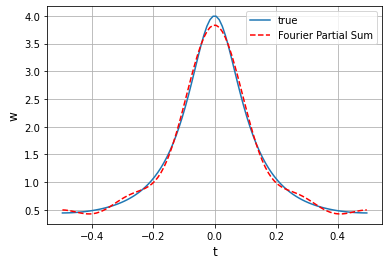

In [10]:
# get fourier coefficients of spectral density
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N = 100
dt = 1/N
a = 1/2  # please touch! (|a| near 0 gives flat w, |a| near 1 gives sharp w )
t = np.arange(dt/2-1/2,1/2,dt)
w = 1/(1 - 2*a*np.cos(2*np.pi*t) + a**2)
plt.plot(t, w)

wrecon = 0*w

for n in range(-4,5):
    cn = sum(np.exp(-2*np.pi*1j*n*t)*w)*dt
    wrecon = wrecon + (cn.real)*np.cos(2*np.pi*n*t)
    print('c_' + str(n) + ' = ', cn.real)
    
plt.plot(t, wrecon,'r--')
plt.grid('on')
plt.xlabel('t', fontsize=12)
plt.ylabel('w', fontsize=12)
plt.legend(['true','Fourier Partial Sum']);

\begin{myfig}\label{example:wtrue}
The spectral density, $w$, from (\ref{eq:wexamp1}) with $a=1/2$, and its reconstruction from its first 9 Fourier coefficients.
\end{myfig}

We build the Toeplitz $T_n$ and learn that

\begin{equation*}
  D_n=\det(T_n)=\frac{1}{1-a^2}=c_0
\end{equation*}

for every $n\ge 0$. (Confirm this using row reduction)

We build the OPUC sequence

\begin{equation*}
  \phi_0(z) = c_0^{-1/2} \\
  \phi_n(z) = \frac{1}{c_0}\sum_{j=0}^n(-1)^{j+n}\det(T_n(!n,!j))z^j
\end{equation*}

We construct these polynomials via sympy


In [3]:
# get polynomials that are orthonormal on the unit disk wrt w
import sympy as sym
from sympy import init_session
init_session(quiet=True)

z = sym.symbols('z')
a = sym.symbols('a')

for n in range(1,6):

    Tn = np.zeros((n+1,n+1)) 
    sTn = sym.Matrix(Tn)

    for i in range(n):
        for j in range(n+1):
            sTn[i,j] = a**abs(i-j)/(1-a**2)

    for j in range(n+1):
        sTn[n,j] = z**j    # last row has powers of z

    #print(sTn)
    phin = simplify(det(sTn)*(1-a**2))
    phin = series(phin, z)
    print('phi_' + str(n) + ' =', phin)


phi_1 = -a + z
phi_2 = -a*z + z**2
phi_3 = -a*z**2 + z**3
phi_4 = -a*z**3 + z**4
phi_5 = -a*z**4 + z**5


\begin{exercise}\label{ex:ellj0}
This suggests that $\ell_j=0$ in (\ref{eq:opucelln}) for $j>1$. Prove that this is the case by arguing that the second row of $T_n(!n,!0)$ is a multiple of the first.
\end{exercise}

It now follows that $v_1=-a$ so the best $u_0=a$ so the best prediction of $x_1$ is $ax_0$ and the associated mean squared error is 1.

## The Fast Fourier Transform*

In practice we are most often confronted not with an analytical expression
of a function on the unit interval but rather with $N$ samples over an 
interval of duration $T$:

\begin{equation*}
  f_N(m) \equiv f(mdt), \hskip 0.25in dt \equiv T/N, \hskip 0.25in m=0,\ldots,N-1.
\end{equation*}

We now attempt to develop $f_N$ in a discrete Fourier series of the form 

\begin{equation}
  f_N(m) = \frac{1}{N} \sum_{n=0}^{N-1} \hat f_N(n)\exp(2\pi inm/N). 
    \label{eq:dfs1}
\end{equation}

On defining

\begin{equation*}
  w_N \equiv \exp(2\pi i/N)
\end{equation*}

we note that \ref{eq:dfs1}) takes the very simple form, 

\begin{equation}
  \frac{1}{N}\sum_{n=0}^{N-1} w^{mn}_N \hat f_N(n) = f_N(m). \label{eq:dfs2}
\end{equation}

This in turn may be written as the matrix equation

\begin{equation}
  \frac{1}{N} F_N \hat f_N = f_N \label{eq:Fcf}
\end{equation}

where, noting that $w^N_N = 1$,

\begin{equation}
  F_N = \begin{pmatrix}
    1 & 1 & 1 & \cdot & 1 \\
    1 & w_N & w_N^2 & \cdots & w_N^{N-1} \\
    1 & w_N^2 & w_N^4 & \cdots & w_N^{2(N-1)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & w_N^{N-1} & w_N^{2(N-1)} & \cdots & w_N^{(N-1)^2}
  \end{pmatrix}. \label{eq:fourmat}
\end{equation}

We now exploit this very special structure of $F_N$ and arrive at an
elegant solution to \ref{eq:Fcf}). 
To begin we examine the $jk$ element of $F_N^*F_N$, i.e., row $j$ 
of $F_N^*$ (the conjugate transpose of $F_N$) times column $k$ of $F_N$,

\begin{equation}
  (F_N^*F_N)_{jk} = 1\cdot 1 + \ov w_N^{j-1}w_N^{k-1} + \ov w_N^{2(j-1)}w_N^{2(k-1)} + \cdots +
  \ov w_N^{(N-1)(j-1)}w_N^{(N-1)(k-1)}.  \label{eq:Fourjk}
\end{equation}

If $j=k$ then $\ov w_N^{m(j-1)}w_N^{m(k-1)}=\exp(-2\pi im(j-1))\exp(2\pi im(j-1))=1$ for each
$m$ and $(F_N^*F_N)_{jj}=N$. If $j\ne k$ we let $z=\ov w_N^{(j-1)}w_N^{(k-1)}$ and find
the finite geometric series \index{geometric series}

\begin{equation}
  (F_N^*F_N)_{jk} = 1 + z + z^2 + \cdots + z^{N-1} = \frac{1-z^N}{1-z} = 0.
  \label{eq:FFjk}
\end{equation}

The middle equality is justified in Exer.~\secref{cv1}.\ref{geoser} and 
the final equality stems from $z^N=1$. 
Gathering the above computations, we have shown that

\begin{equation}
  F_N^*F_N = NI \hskip 0.25in\hbox{and so}\hskip 0.25in F_N^{-1} = \frac{1}{N}F_N^* \and 
   \hat f_N = F_N^*f_N \label{eq:dft1}
\end{equation}

is the solution to \ref{eq:Fcf}).
We speak of $\hat f_N$ as the  **Discrete Fourier Transform**  (DFT) of 
$f_N$ and note the latter equation in (\ref{eq:dft1}) may be
expressed in component form as \index{discrete Fourier Transform}

\begin{equation}
  \hat f_N(m) = \sum_{n=0}^{N-1}\ov w_N^{mn} f_N(n)
   = \sum_{n=0}^{N-1}\exp(-2\pi i(m/T)(ndt)) f(ndt). \label{eq:dft2}
\end{equation}

As such we interpret $m/T$ as the associated discrete frequencies.
It also follows from \ref{eq:dft2}) that if $f_N$ is real then

\begin{equation}
  \eqalign{
  \hat f_N(N/2+j) &= \sum_{n=0}^{N-1}\exp(-2\pi i n(N/2+j)/N) f_N(n) \cr
   &= \sum_{n=0}^{N-1}\exp(-\pi i n - 2\pi ijn/N) f_N(n) \cr
   &= \sum_{n=0}^{N-1}\exp(\pi i n - 2\pi ijn/N) f_N(n) \cr
   &= \sum_{n=0}^{N-1}\exp(2\pi i n(N/2-j)/N) f_N(n) 
    = \ov{\hat f}_N(N/2-j), \cr}
    \hskip 0.25in j=1,2,\ldots,N/2-1, \label{eq:csym}
\end{equation}

and as such only the first $1+N/2$ frequencies

\begin{equation*}
  \om_m = m/T, \hskip 0.25in m=0,\ldots,N/2,
\end{equation*}

carry information. We illustrate it, in \fig\figref{chainfreq}, 
by "recovering" the driving frequency and two frequencies 
of vibration of the 2-mass system \fig\figref{ms2}(A) from knowledge
of the displacement of the first mass. In particular, with a driving
frequency of $a/2\pi$ at the first mass we use  *chain2.m*   to
compute the first displacement up to time $T=40$ at $N=400000$ points.
The code
\begin{verbatim}
     fx1 = fft(x1);
     omega = (0:N-1)/T;
     plot(omega,abs(fx1)/max(abs(fx1)),'k')
\end{verbatim}
then peaks at the frequencies present in $x_1$.



\centerline{\psfig{figure=c6/chain2freq.eps,width=3in}
            \psfig{figure=c7/fftbittree.eps,width=3in}}
            %\psfig{figure=c7/ar1pow.eps,width=3in}}
\figlabel{chainfreq}
\Fig\figref{chainfreq} 
(A) Detecting the frequencies present in the vibration of a two mass system
when the first mass is driven at frequency $a/(2\pi)$ where $a=3$ and $a=4$.
The two curves coincide at the system's natural, or resonant, frequencies
$1/(2\pi)$ and $\sqrt 3/(2\pi)$, while the black curve also peaks at
the driving frequency $3/(2\pi)$ and the red curve also peaks at
the driving frequency $4/(2\pi)$.  ( *chainfreq.m*  )
%(B) The power spectra of $x_{j+1}-a_1x_j=\eps_j$ with $a_1=\pm 0.95$.
(B) Partition of 8 indicies into their even (left) and odd (right) parts.
( *fftbittree.m*  )



Regarding the implementation of  *fft*   we suppose $N$ is even and partition
our vector $f_N$ into its even and odd parts

\begin{equation*}
  f_{N/2}^e(n) = f_N(2n) \and f_{N/2}^o(n) = f_N(2n+1), \hskip 0.25in n=0,\ldots,N/2-1,
\end{equation*}

and proceed to partition (\ref{eq:dft2}) into its even and odd parts, i.e.,

\begin{equation*}
  \eqalign{\hat f_N(m) 
   &= \sum_{n=0}^{N-1}\exp(-2\pi imn/N) f_N(n) \cr
  &= \sum_{n=0}^{N/2-1}\exp(-2\pi im(2n)/N) f_N(2n) 
     + \sum_{n=0}^{N/2-1}\exp(-2\pi im(2n+1)/N) f_N(2n+1) \cr
  &= \sum_{n=0}^{N/2-1}\exp(-2\pi imn/(N/2)) f_N(2n) 
     + \exp(-2\pi im/N)\sum_{n=0}^{N/2-1}\exp(-2\pi imn/(N/2)) f_N(2n+1) \cr
  &= \hat f_{N/2}^e(m) + \ov w_N^m \hat f_{N/2}^o(m). \cr}
\end{equation*}

The left hand side makes sense for $0\le m\le N-1$, the right side only for 
$0\le m\le N/2-1$. But the left is symmetric about $N/2$, recall (\ref{eq:csym}),

\begin{equation*}
  \eqalign{\hat f_N(N/2+j) &= \sum_{n=0}^{N-1}\exp(-2\pi i(N/2+j)n/N) f_N(n) \cr
   &= \sum_{n=0}^{N-1}\exp(-2\pi ijn/N) \exp(-\pi in)f_N(n) \cr
   &= \sum_{n=0}^{N/2-1}\exp(-2\pi ij2n/N) f_N(2n)  -
    \sum_{n=0}^{N/2-1}\exp(-2\pi ij(2n+1)/N) f_N(2n+1) \cr
  &= \hat f^e_{N/2}(j) - \ov w_N^j\hat f^e_{N/2}(j). \cr}
\end{equation*}

If $N/2$ is also even we may partition $f_{N/2}^e$ into its even and odd parts,

\begin{equation*}
  f_{N/4}^{ee}(n) = f_{N/2}^e(2n) \and f_{N/4}^{eo}(n) = f_{N/2}^e(2n+1), \hskip 0.25in n=0,\ldots,N/4-1,
\end{equation*}

and so find

\begin{equation*}
  \hat f_{N/2}^e(m) = \hat f_{N/4}^{ee}(m) + \ov w_{N/2}^m \hat f_{N/4}^{eo}(m)
\end{equation*}

So if $N=2^p$ then we can go all the way and in that case it is best to presort the data
in $f_N$. We illustrate this in \fig\figref{chainfreq}(B) for vectors of size $N=8$.
To discern the pattern in this binary tree we express each index as a 3 bit binary word.
At the bottom of the tree this yields,

\begin{equation*}
   (0,4,2,6,1,5,3,7) = (000,\ 100,\ 010,\ 110,\ 001,\ 101,\ 011,\ 111)
\end{equation*}

compared to the bit reversed sequence

\begin{equation*}
  (000,\ 001,\ 010,\ 011,\ 100,\ 101,\ 110,\ 111)=(0,1,2,3,4,5,6,7).
\end{equation*}

This is the permutation $(14)(36)$.

\begin{exercise}\label{ex:dparseval} Use (\ref{eq:dft1}) to derive  **Parseval's Theorem** 
\index{Parseval's Theorem}

\begin{equation}
  \|\hat f_N\|^2 = N\|f_N\|^2. \label{eq:parseN}
\end{equation}

\end{exercise}


## Notes

For a more thorough introduction to Complex Variables see {LevinsonRed}.
Our presentation of M&ouml;bius transformations follows {Ford}. For a more
spectacular view consult {Indra}. Our presentation of Fourier Series is drawn
from {K&ouml;rner}.

Our presentation of the Fourier Analysis of Stationary Processes follows Grenander and Szego.
See also Doob, and Brillinger.

Our presentation of the the FFT follows...



\begin{exercise}\label{ex:Butterworth} The filter we studied in Exer.~\secref{dyn}.\ref{filt1} is a
first order  **Butterworth filter**  with cutoff frequency $f_c=1/(2\pi\tau)$. The transfer
function of the $n$th order Butterworth filter with cutoff frequency $\omega_c$ obeys

\begin{equation}
  |H(i\omega)|^2 = \frac{G_0^2}{1+(\omega/\omega_c)^{2n}}. \label{eq:Butn1}
\end{equation}

(a) Show that if $H$ satisfies $H(\ov{s})=\ov{H(s)}$ and

\begin{equation}
  H(s)H(-s) = \frac{G_0^2}{1+(-s^2/\omega_c^2)^n} \label{eq:Butn2}
\end{equation}

then $H$ obeys (\ref{eq:Butn1}. \index{Butterworth Filter})

 (b) Show that the $n$ poles of (\ref{eq:Butn2}) with negative real parts are

\begin{equation*}
  s_k = \omega_c\exp(i\pi(2k+n-1)/(2n)), \hskip 0.25in k=1,\ldots,n,
\end{equation*}

and that the transfer function can now be written

\begin{equation} \label{eq:Butn22}
  H(s) = \frac{G_0}{\prod_{k=1}^n(s-s_k)/\omega_c}.  
\end{equation}

(c) We naturally define the normalized Butterworth polynomials with $\omega_c=1$,

\begin{equation*}
  B_n(s) \equiv \prod_{k=1}^n(s-s_k).
\end{equation*}

Show that if $n$ is even then

\begin{equation*}
  B_n(s) = \prod_{k=1}^{n/2}(s-s_k)(s-\ov{s_k}) 
            = \prod_{k=1}^{n/2}(s^2-2s\cos((2k+n-1)\pi/(2n))+1).
\end{equation*}

Find the similar representation when $n$ is odd. 

 (c) Let us  *realize*  a second order filter with cutoff frequency $\omega_c$. Please confirm that the transfer function
of the circuit in \fig\figref{Butter2}(A) is

\begin{equation*}
  H(s) = \frac{\hat V_o(s)}{\hat V_i(s)} = \frac{1}{R^2C_1C_2s^2+2RC_2s + 1}.
\end{equation*}

(d) Now set $H(s)=1/B_2(s/\omega_c)$ from part (c) and conclude that $C_1=2C_2$ and $R=1/(C_2\omega_c\sqrt 2)$. Let $\omega_c=100\ rad/s$ and $C_2=10\,nF$ and confirm that

\begin{equation*}
  Gain(\omega) \equiv 20\log_{10}|H(i\omega)|
\end{equation*}

behaves as in \fig\figref{Butter2}(B). Note that $Gain(\omega_c)\approx -3\, dB$ and that our
filter offers $40\ dB$ of attenuation per decade while that of first order filter, \fig\figref{filt1}, 
offered only $20\ dB$.
\end{exercise}



\centerline{\psfig{figure=c1/Butter2.eps,width=3in}
            \psfig{figure=c7/BodeLow2.eps,width=3in}}
\figlabel{Butter2}
\Fig\figref{Butter2} 
(A) A second order Butterworth Filter ( *Butter2.m*  ) and its
(B) Bode plot. ( *BodeLow2.m*  )
 

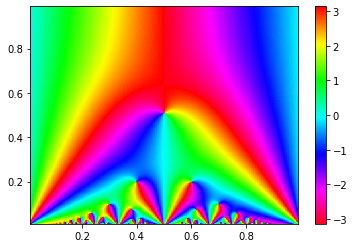

In [1]:
# Eisenstein functions

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N = 300  # 800 is good

sigma = np.ones(N,)
enn = np.arange(1,N+1) #, dtype=np.uint32)
s = 5.0

for n in enn:
    for d in range(2,n+1):
        if ( n % d == 0 ):
            sigma[n-1] = sigma[n-1] + d**s

x = np.linspace(0.01,0.99,400)
y = np.linspace(0.01,0.99,400)
X, Y = np.meshgrid(x,y)
Z = X + 1j*Y
G = np.zeros((400,400))

for n in enn:
    G = G + sigma[n-1]*np.exp(2*np.pi*1j*n*Z)

bob = plt.pcolormesh(X, Y, np.angle(G), cmap='hsv_r', vmin = -np.pi, vmax = np.pi)
plt.colorbar(bob);

In [308]:
np.exp(-900*0.01*2*np.pi)*900**5.0


1.630940727775518e-10

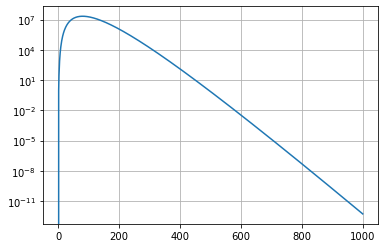

In [307]:
n = np.arange(0,1e3)
fc = np.exp(-n*0.01*2*np.pi)*n**5.0
plt.semilogy(n,fc)
plt.grid('on')